**Import Libraries & Dataset**

In [46]:
!pip install kneed

In [47]:
#Import libraries
#loading dataset
import pandas as pd
import numpy as np

#visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns
from kneed import KneeLocator

# data modeling
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import ward,dendrogram,linkage
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture

# Model performance
from sklearn.preprocessing import  StandardScaler
from sklearn import metrics
from sklearn.metrics import silhouette_score
from tqdm import tqdm
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA

#warnings
import warnings
warnings.simplefilter(action='ignore')

In [48]:
#read_data
data=pd.read_csv("/content/drive/MyDrive/Customer segmentation/Customer DataSet.csv")
#dataframe
df=pd.DataFrame(data)
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


**Analysis and Visualization**

In [49]:
#get some information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [50]:
# Describe the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [51]:
df.nunique()

CUST_ID                             8950
BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

**Missing value & duplicated raw**

In [52]:
def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False) # Total number of null values
    percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False) # Percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent']) # Putting the above two together
    return missing_data

missing_check(df)

,Total,Percent
MINIMUM_PAYMENTS,313,3.497207
CREDIT_LIMIT,1,0.011173
CUST_ID,0,0.000000
BALANCE,0,0.000000
PRC_FULL_PAYMENT,0,0.000000
PAYMENTS,0,0.000000
PURCHASES_TRX,0,0.000000
CASH_ADVANCE_TRX,0,0.000000
CASH_ADVANCE_FREQUENCY,0,0.000000
PURCHASES_INSTALLMENTS_FREQUENCY,0,0.000000


In [53]:
mask = df['CREDIT_LIMIT'].isnull()
df[mask]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5203,C15349,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,NaN,9.040017,14.418723,0.0,6


In [54]:
mask2 = df['MINIMUM_PAYMENTS'].isnull()
data[mask2].describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,313.0,555.441321,1292.687887,0.0,0.187069,16.848358,286.686616,9164.724752
BALANCE_FREQUENCY,313.0,0.389403,0.408341,0.0,0.090909,0.181818,1.000000,1.000000
PURCHASES,313.0,393.087284,757.905701,0.0,1.400000,130.400000,399.950000,7597.090000
ONEOFF_PURCHASES,313.0,250.433387,624.453991,0.0,0.000000,0.000000,176.030000,6761.290000
INSTALLMENTS_PURCHASES,313.0,142.653898,311.289043,0.0,0.000000,0.000000,152.280000,2959.240000
CASH_ADVANCE,313.0,559.136698,1185.132567,0.0,0.000000,0.000000,480.104401,7616.064965
PURCHASES_FREQUENCY,313.0,0.336043,0.372517,0.0,0.083333,0.166667,0.583333,1.000000
ONEOFF_PURCHASES_FREQUENCY,313.0,0.107886,0.227370,0.0,0.000000,0.000000,0.083333,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,313.0,0.244670,0.359756,0.0,0.000000,0.000000,0.416667,1.000000
CASH_ADVANCE_FREQUENCY,313.0,0.067169,0.130087,0.0,0.000000,0.000000,0.083333,1.000000


Text(0.5, 1.0, 'Correlation ')

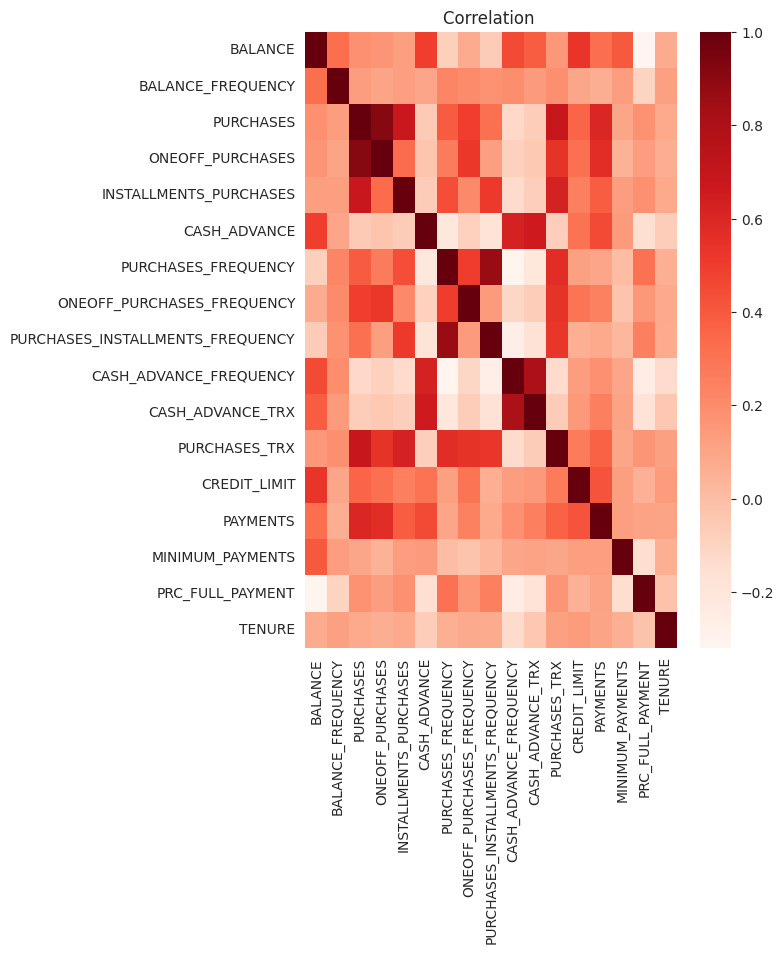

In [55]:
corr=df.corr()
fig = plt.figure(figsize=(6,8))
r = sns.heatmap(corr, cmap='Reds')
r.set_title("Correlation ")

**Based on the analysis:**
1.   Since the credit limit feature has only 0.01% of records with missing values (just 1 record), it is reasonable to drop that record.
2.  The Customer ID feature is unique for each customer and does not contribute to determining clusters, so it can be dropped as well.
3.   All values in the PRC_FULL_PAYMENT column are zero, which suggests it might not be informative for clustering.
4.   The feature MINIMUM_PAYMENTS exhibits varied values, making it unsuitable for imputation using univariate techniques.
5. MINIMUM_PAYMENTS is not highly correlated with other features.
6. The number of missing data is small compared to the total dataset.

*Conclusively, rows with missing values can be safely removed from the dataset.*









In [56]:
# create a copy for the data transformation
df1=df.copy()
df1.dropna(inplace = True)  # drop null values
df1.reset_index(drop = True, inplace = True)

In [57]:
#customer ID, does not reflect any useful information about the data.
df1.drop('CUST_ID', axis = 1, inplace = True)  #drop customer id
df1.reset_index(drop = True, inplace = True)
df1

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
4,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8631,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6
8632,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8633,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8634,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


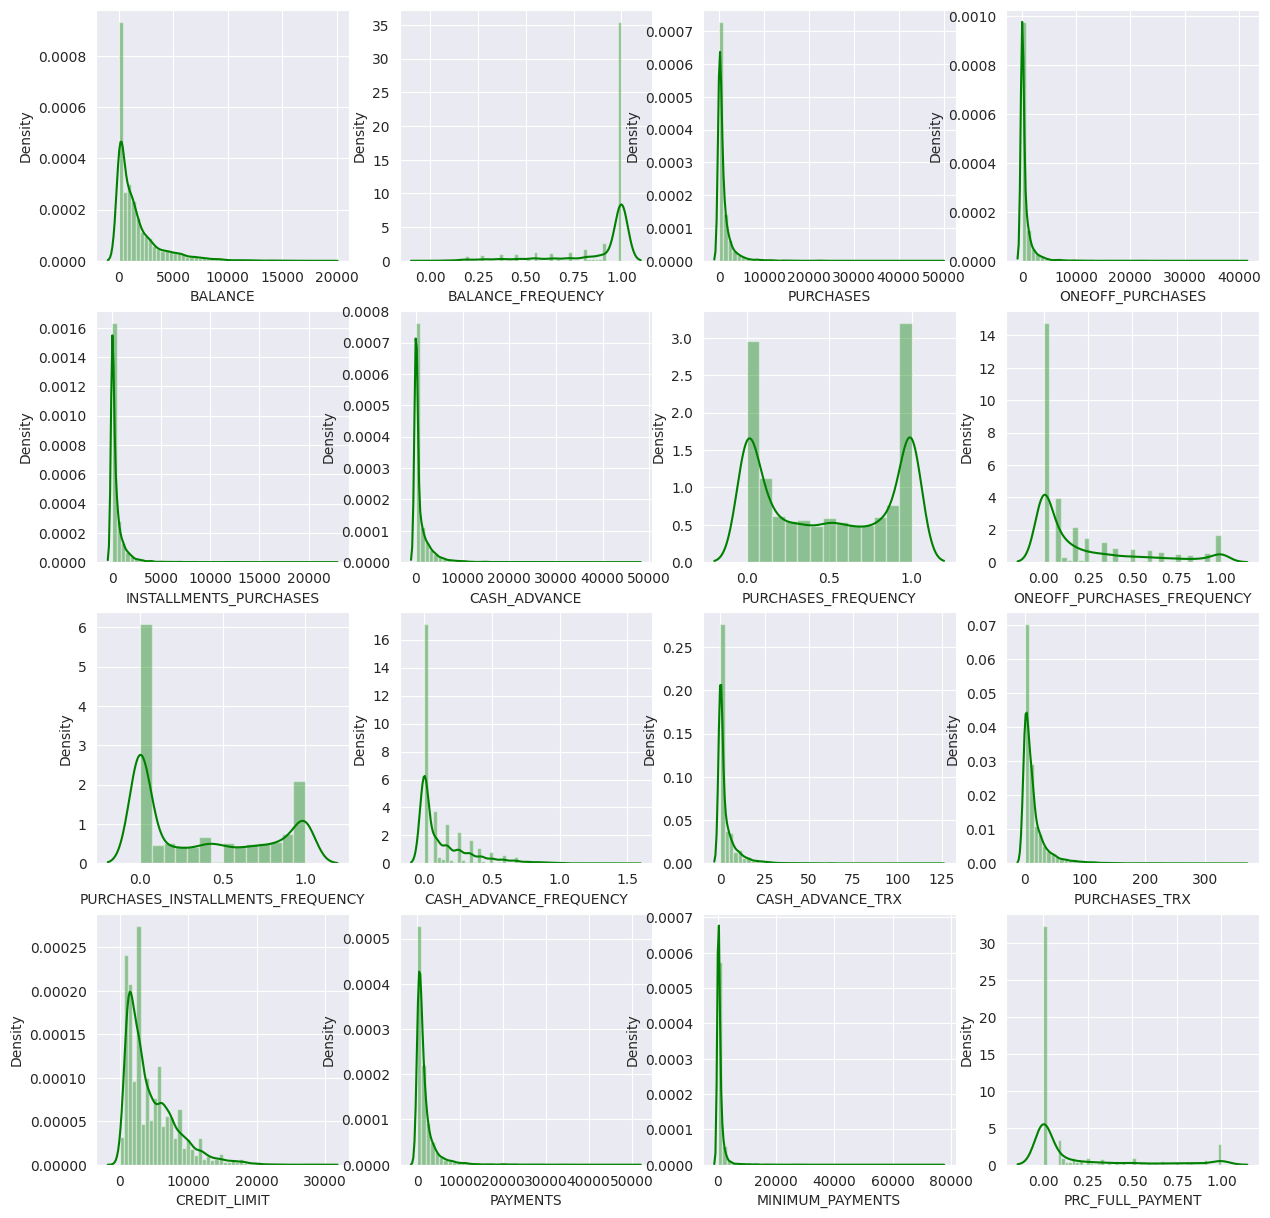

In [58]:
# Create a 4x4 grid of subplots with a specified size
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))

# Set the style of the plots to 'darkgrid' for a dark background with grid lines
sns.set_style('darkgrid')

# Loop through each subplot in the grid
for i in range(4):
    for j in range(4):
        # Plot the distribution of each numerical feature using seaborn's distplot
        sns.distplot(df1[df1.columns[4 * i + j]], ax=axs[i,j],color='green')

# Show the plot
plt.show()

Considering the data preprocessing, certain features exhibit significant skewness, necessitating further inspection to detect outliers.

In [59]:
#counts the number of duplicated rows
df1.duplicated().sum()

0

**Noise data**

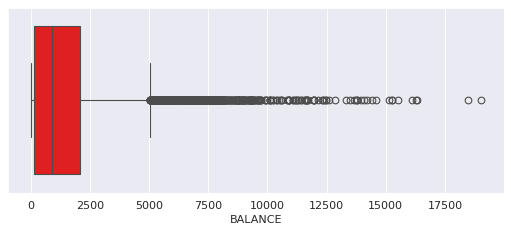

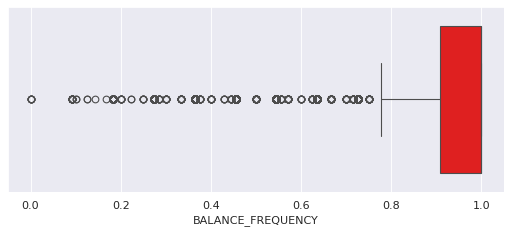

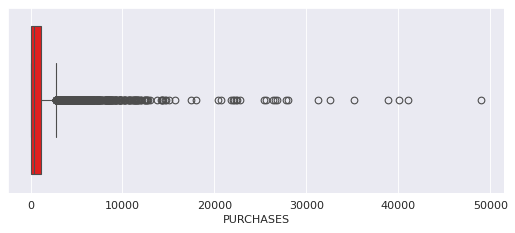

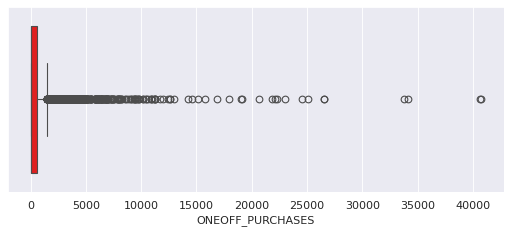

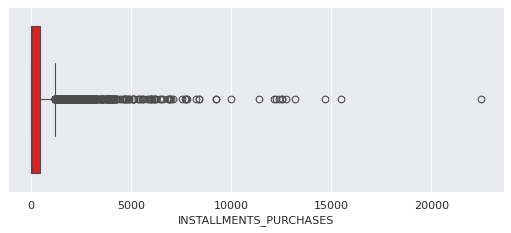

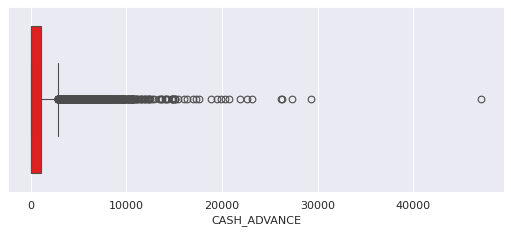

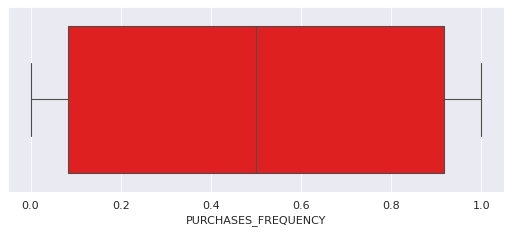

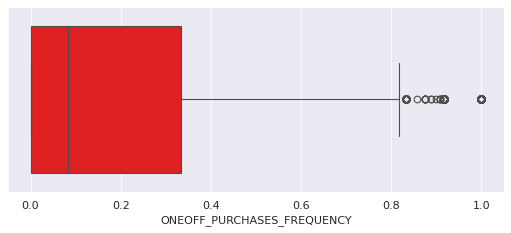

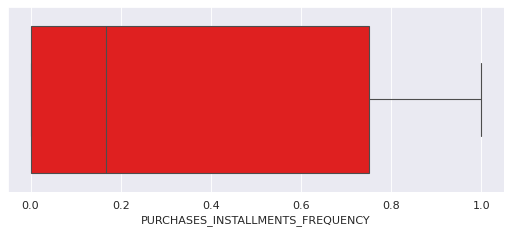

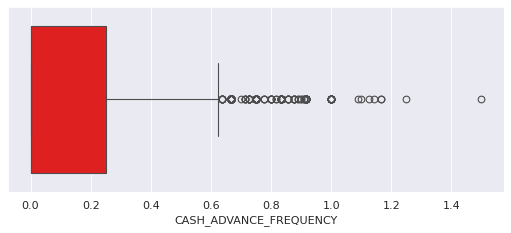

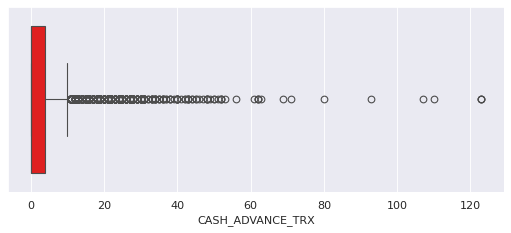

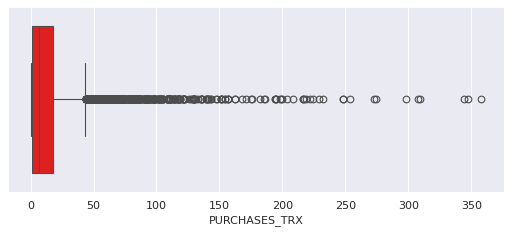

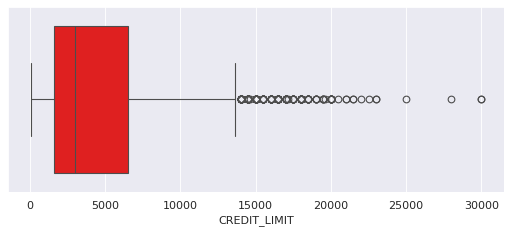

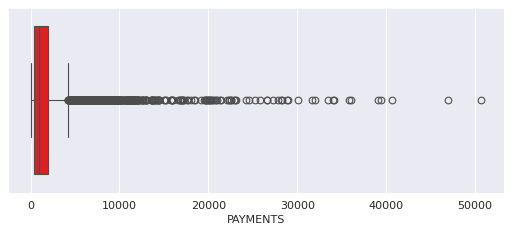

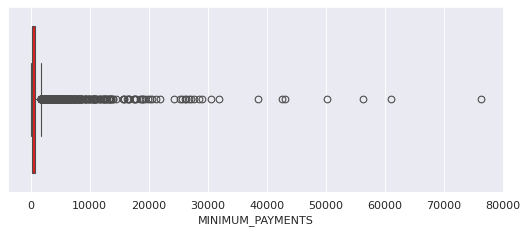

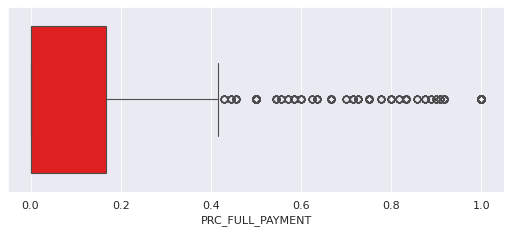

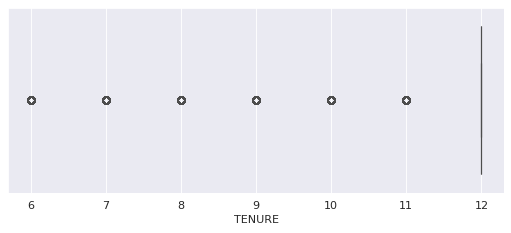

In [60]:
# This section iterates over each column in the DataFrame
i = 0
while i < len(df1.columns):
    try:
        # Create a new figure for each column's boxplot
        fig = plt.figure(figsize=(8, 3), dpi=80)

        # Create a boxplot for the current column
        sns.boxplot(x=df1.columns[i], data=df1 , color='red')

        # Move to the next column
        i += 1
    except:
        # If an error occurs (e.g., column type not compatible with boxplot), skip to the next column
        continue

# Display all the generated boxplots together
plt.show()



**Based on the plotted graphs:**

1. BALANCE: Outliers exceeding 17500 may indicate noise.
2. BALANCE_FREQUENCY: Occasional zeros, though not significant.
3. PURCHASES: Outliers surpassing 30000, with one around 50000 possibly noise.
4. ONEOFF_PURCHASES: Outliers beyond 33000.
5. INSTALLMENT_PURCHASES: A value over 20000 may be noise.
6. CASH_ADVANCE: Values exceeding 40000 are outliers.
7. PURCHASES_FREQUENCY: No outliers observed.
8. ONEOFF_PURCHASES_FREQUENCY: No noticeable outliers.
9. PURCHASES_INSTALLMENT_FREQUENCY: No outliers detected.
10. CASH_ADVANCE_FREQUENCY: A value above 14 seems outlier, albeit low chance of being noise.
11. CASH_ADVANCE_TRX: Majority of values near "0", requires analysis in relation to other features.
12. PURCHASES_TRX: Similar to CASH_ADVANCE_TRX, requires contextual analysis.
13. CREDIT_LIMIT: Samples at or above 25000 warrant inspection.
14. PAYMENTS: Several outliers above 45000.
15. MINIMUM_PAYMENTS: Values exceeding 35000 warrant careful review.
16. PRC_FULL_PAYMENT: No outliers or noise.
17. TENURE: Discrete values, requires further examination.





**Handling Noises**

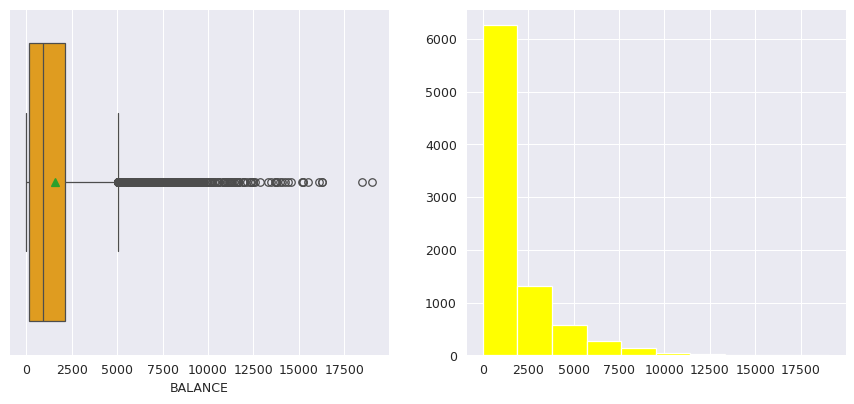

In [61]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5), dpi=90)

# Left subplot: Boxplot
sns.boxplot(x=df1.BALANCE, showmeans=True, orient='h', color="orange", data=df1, ax=axes[0])
# Set the orientation to horizontal and show the mean ,Color the boxplot with violet color ,Data source is the 'BALANCE' column of DataFrame df1

# Right subplot: Histogram
df1['BALANCE'].hist(bins=10, color='yellow', ax=axes[1])
# Create a blue bar histogram of 'BALANCE' column with 10 bins # Data source is the 'BALANCE' column of DataFrame df1

# Display the plots
plt.show()

Similar to above we apply on all columns

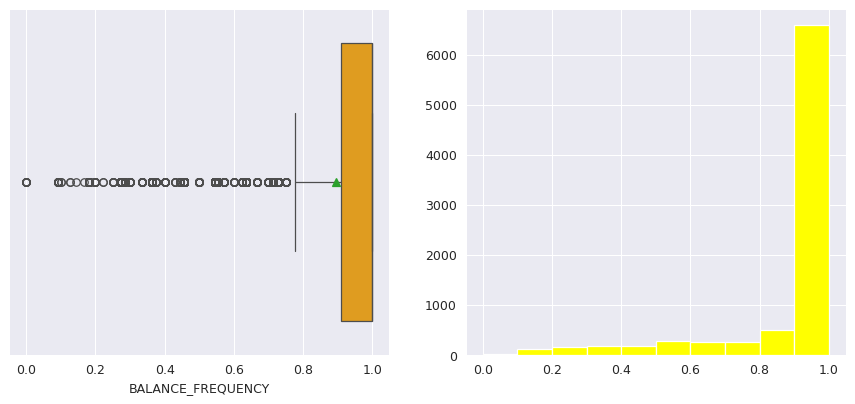

In [62]:
fig, axes = plt.subplots(1,2,figsize=(12,5),dpi = 90)
# count of col (countplot)
sns.boxplot(x =df1.BALANCE_FREQUENCY, data = df1,showmeans=True, orient='h',color="orange",ax=axes[0] )
df1['BALANCE_FREQUENCY'].hist(bins = 10,color='yellow',ax=axes[1])
plt.show()

In [63]:
# Filtering the DataFrame df1 to include only rows where BALANCE_FREQUENCY is less than 0.1
df1__ = df1['BALANCE_FREQUENCY'] < 0.1
# Counting the number of True values after filtering
sum(df1__)

31

In [64]:
# Finding the 10 smallest values in the BALANCE_FREQUENCY column
df1['BALANCE_FREQUENCY'].nsmallest(10)

1480    0.000000
4779    0.000000
6824    0.000000
7201    0.000000
7429    0.000000
7584    0.000000
181     0.090909
695     0.090909
723     0.090909
1014    0.090909
Name: BALANCE_FREQUENCY, dtype: float64

In [65]:
# Generating descriptive statistics for the BALANCE_FREQUENCY column
df1['BALANCE_FREQUENCY'].describe()

count    8636.000000
mean        0.895035
std         0.207697
min         0.000000
25%         0.909091
50%         1.000000
75%         1.000000
max         1.000000
Name: BALANCE_FREQUENCY, dtype: float64


The values in the 'BALANCE_FREQUENCY' column equal to zero are not considered noise or outliers, as they are not significantly distant from the rest of the data points.

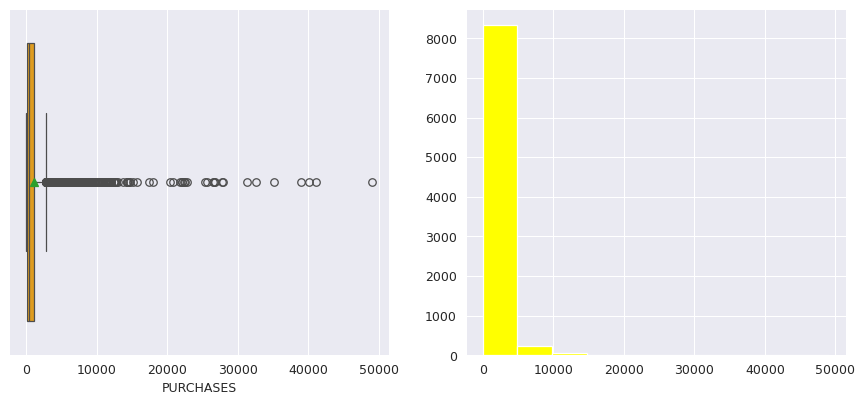

In [66]:
fig, axes = plt.subplots(1,2,figsize=(12,5),dpi = 90)

# count of col (countplot)

sns.boxplot(x =df1.PURCHASES, showmeans=True, orient='h',color="orange",data = df1,ax=axes[0] )

df1['PURCHASES'].hist(bins = 10,color='yellow',ax=axes[1])

plt.show()

In [67]:
#PURCHASES > 30000
df1[df1["PURCHASES"]>30000]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
246,5131.319584,1.0,32539.78,26547.43,5992.35,0.000000,1.000000,1.000000,1.000000,0.000000,0,98,11500.0,26652.34432,1971.129435,0.083333,12
464,13479.288210,1.0,41050.40,40624.06,426.34,0.000000,0.833333,0.666667,0.416667,0.000000,0,157,17000.0,36066.75068,15914.484620,0.083333,12
512,11547.520010,1.0,49039.57,40761.25,8278.32,558.166886,1.000000,1.000000,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.250000,12
1166,4010.621974,1.0,40040.71,24543.52,15497.19,0.000000,1.000000,1.000000,1.000000,0.000000,0,358,18000.0,33994.72785,703.503256,1.000000,12
1509,3391.702180,1.0,38902.71,33803.84,5098.87,0.000000,1.000000,1.000000,1.000000,0.000000,0,195,18000.0,35843.62593,716.027656,1.000000,12
1545,3454.094319,1.0,31299.35,19064.30,12235.05,0.000000,1.000000,0.666667,0.833333,0.000000,0,121,7500.0,22542.58705,1193.031030,0.583333,12
3792,2997.977825,1.0,35131.16,34087.73,1043.43,0.000000,1.000000,1.000000,0.833333,0.000000,0,344,12000.0,28896.66522,767.014180,0.750000,12


In [68]:
df1['PURCHASES'].describe()

count     8636.000000
mean      1025.433874
std       2167.107984
min          0.000000
25%         43.367500
50%        375.405000
75%       1145.980000
max      49039.570000
Name: PURCHASES, dtype: float64

In [69]:
# Filter rows where purchase amount exceeds 30000
df1__ = df1['PURCHASES'] > 30000

# Describe "PURCHASES" column for rows where purchase amount is not greater than 30000
df1[df1__ == False]['PURCHASES'].describe()

count     8629.000000
mean       995.207238
std       1883.487877
min          0.000000
25%         43.250000
50%        374.950000
75%       1141.240000
max      27957.680000
Name: PURCHASES, dtype: float64

There is a noteworthy observation regarding one particular sample (index = 512), where both the PURCHASES and PAYMENTS fall within the outlier range. Additionally, potential outliers noticeably influence the statistics, particularly the mean value of this column. These potential outliers are located at indices 246, 464, 512, 1166, 1509, 1545, and 3792.

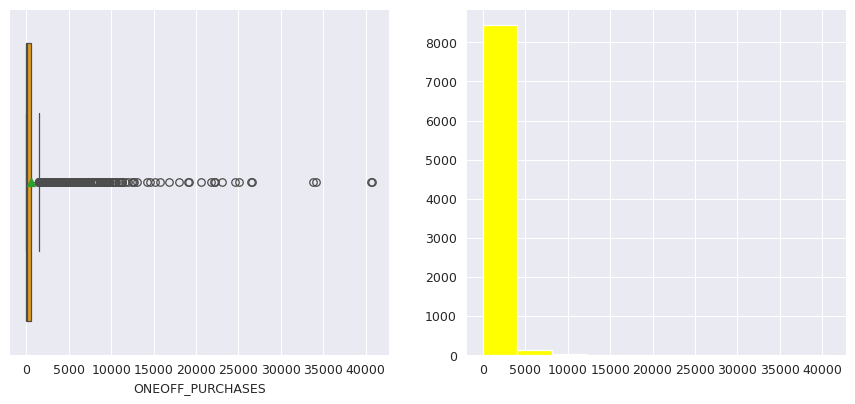

In [70]:
fig, axes = plt.subplots(1,2,figsize=(12,5),dpi = 90)

# count of col (countplot)

sns.boxplot(x =df1.ONEOFF_PURCHASES, showmeans=True, orient='h',color="orange",data = df1,ax=axes[0] )

df1['ONEOFF_PURCHASES'].hist(bins = 10,color='yellow',ax=axes[1])

plt.show()

In [71]:
#ONEOFF_PURCHASES > 30000
df1['ONEOFF_PURCHASES'].nlargest(8)

512     40761.25
464     40624.06
3792    34087.73
1509    33803.84
246     26547.43
6818    26514.32
1355    25122.77
1166    24543.52
Name: ONEOFF_PURCHASES, dtype: float64

In [72]:
df1[df1["ONEOFF_PURCHASES"]>30000]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
464,13479.288210,1.0,41050.40,40624.06,426.34,0.000000,0.833333,0.666667,0.416667,0.000000,0,157,17000.0,36066.75068,15914.484620,0.083333,12
512,11547.520010,1.0,49039.57,40761.25,8278.32,558.166886,1.000000,1.000000,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.250000,12
1509,3391.702180,1.0,38902.71,33803.84,5098.87,0.000000,1.000000,1.000000,1.000000,0.000000,0,195,18000.0,35843.62593,716.027656,1.000000,12
3792,2997.977825,1.0,35131.16,34087.73,1043.43,0.000000,1.000000,1.000000,0.833333,0.000000,0,344,12000.0,28896.66522,767.014180,0.750000,12


Upon examining the samples identified by this filter alongside those from the previous feature, it's evident that all the outliers detected in the ONEOFF_PURCHASES column are also outliers in the PURCHASES column. These outliers are located at indices 464, 512, 1509, and 3792.

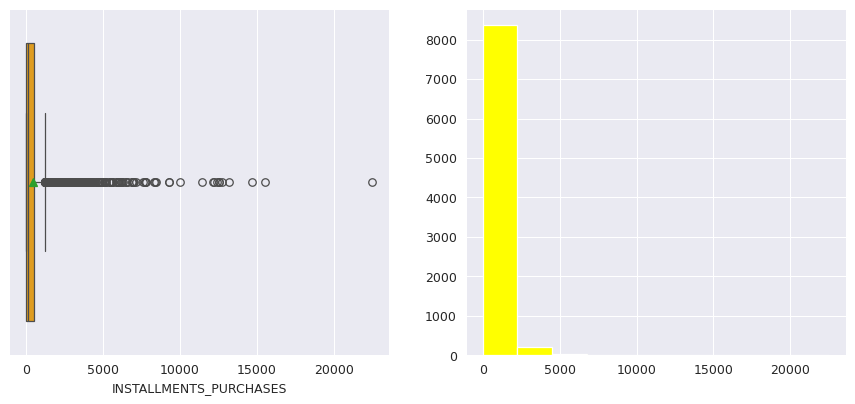

In [73]:
fig, axes = plt.subplots(1,2,figsize=(12,5),dpi = 90)

# count of col (countplot)

sns.boxplot(x =df1.INSTALLMENTS_PURCHASES, showmeans=True, orient='h',color="orange",data = df1,ax=axes[0] )

df1['INSTALLMENTS_PURCHASES'].hist(bins = 10,color='yellow',ax=axes[1])

plt.show()

In [74]:
#INSTALLMENTS_PURCHASES > 20000
df1['INSTALLMENTS_PURCHASES'].nlargest(8)

5086    22500.00
1166    15497.19
3059    14686.10
3564    13184.43
2707    12738.47
122     12560.85
1612    12541.00
1341    12375.00
Name: INSTALLMENTS_PURCHASES, dtype: float64

In [75]:
df1['INSTALLMENTS_PURCHASES'].describe()

count     8636.000000
mean       420.843533
std        917.245182
min          0.000000
25%          0.000000
50%         94.785000
75%        484.147500
max      22500.000000
Name: INSTALLMENTS_PURCHASES, dtype: float64

In [76]:
mask = df1['INSTALLMENTS_PURCHASES'] < 20000
df1[mask]['INSTALLMENTS_PURCHASES'].describe()

count     8635.000000
mean       418.286595
std        885.984236
min          0.000000
25%          0.000000
50%         94.710000
75%        483.680000
max      15497.190000
Name: INSTALLMENTS_PURCHASES, dtype: float64

In [77]:
df1.sort_values(by = 'INSTALLMENTS_PURCHASES', ascending = False).head(1)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5086,4060.710208,0.727273,22500.0,0.0,22500.0,0.0,0.5,0.0,0.416667,0.0,0,12,23000.0,8760.860264,1645.535202,0.0,12


The outlier at index 5086 stands out due to its considerable distance from the nearest neighboring samples, resulting in a notable change in column statistics upon its removal.

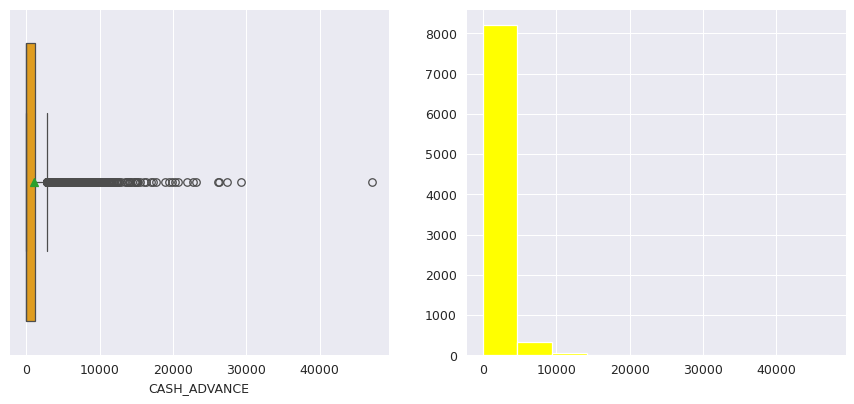

In [78]:
fig, axes = plt.subplots(1,2,figsize=(12,5),dpi = 90)

# count of col (countplot)

sns.boxplot(x =df1.CASH_ADVANCE, showmeans=True, orient='h',color="orange",data = df1,ax=axes[0] )

df1['CASH_ADVANCE'].hist(bins = 10,color='yellow',ax=axes[1])

plt.show()

In [79]:
#CASH_ADVANCE > 40000
df1[df1['CASH_ADVANCE']>40000]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2054,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


In [80]:
df1.loc[df1['CASH_ADVANCE'].nlargest(5).index]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2054,10905.053810,1.000000,431.93,133.50,298.43,47137.21176,0.583333,0.250000,0.500000,1.000000,123,21,19600.0,39048.59762,5394.173671,0.000000,12
977,8823.284205,1.000000,3719.00,2293.18,1425.82,29282.10915,1.000000,0.750000,1.000000,0.416667,26,61,15500.0,28150.97869,7321.639932,0.083333,12
64,2990.422186,0.909091,4523.27,1664.09,2859.18,27296.48576,0.666667,0.500000,0.583333,0.833333,27,33,7000.0,28232.69446,1107.030803,0.454545,12
7022,4530.205197,1.000000,1750.66,643.18,1107.48,26268.69989,1.000000,0.333333,1.000000,0.583333,10,36,8500.0,25203.91336,1366.869273,0.250000,12
7402,7081.171387,1.000000,0.00,0.00,0.00,26194.04954,0.000000,0.000000,0.000000,0.909091,69,0,9000.0,20191.30770,1926.017588,0.222222,11


In [81]:
df1['CASH_ADVANCE'].describe()

count     8636.000000
mean       994.175523
std       2121.458303
min          0.000000
25%          0.000000
50%          0.000000
75%       1132.385490
max      47137.211760
Name: CASH_ADVANCE, dtype: float64

In [82]:
mask = df1['CASH_ADVANCE'] < 45000
df1[mask]['CASH_ADVANCE'].describe()

count     8635.000000
mean       988.831801
std       2062.637616
min          0.000000
25%          0.000000
50%          0.000000
75%       1131.895249
max      29282.109150
Name: CASH_ADVANCE, dtype: float64

In [83]:
df1.loc[df1['CASH_ADVANCE'].nlargest(5).index]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2054,10905.053810,1.000000,431.93,133.50,298.43,47137.21176,0.583333,0.250000,0.500000,1.000000,123,21,19600.0,39048.59762,5394.173671,0.000000,12
977,8823.284205,1.000000,3719.00,2293.18,1425.82,29282.10915,1.000000,0.750000,1.000000,0.416667,26,61,15500.0,28150.97869,7321.639932,0.083333,12
64,2990.422186,0.909091,4523.27,1664.09,2859.18,27296.48576,0.666667,0.500000,0.583333,0.833333,27,33,7000.0,28232.69446,1107.030803,0.454545,12
7022,4530.205197,1.000000,1750.66,643.18,1107.48,26268.69989,1.000000,0.333333,1.000000,0.583333,10,36,8500.0,25203.91336,1366.869273,0.250000,12
7402,7081.171387,1.000000,0.00,0.00,0.00,26194.04954,0.000000,0.000000,0.000000,0.909091,69,0,9000.0,20191.30770,1926.017588,0.222222,11



The sole outlier in this column, located at index 2054, stands out due to its considerable distance from other samples, thus exerting a significant influence on the column's statistics.

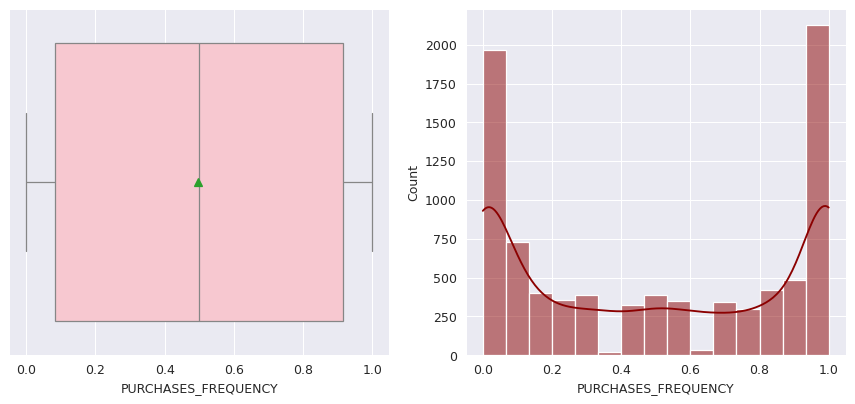

In [84]:
fig, axes = plt.subplots(1,2,figsize=(12,5),dpi = 90)

# count of col (countplot)

sns.boxplot(x =df1.PURCHASES_FREQUENCY, showmeans=True, orient='h',color="pink",data = df1,ax=axes[0] )

sns.histplot(df1.PURCHASES_FREQUENCY,kde=True,color='darkred',ax=axes[1])

plt.show()

that is normal.(This feature is discrete)

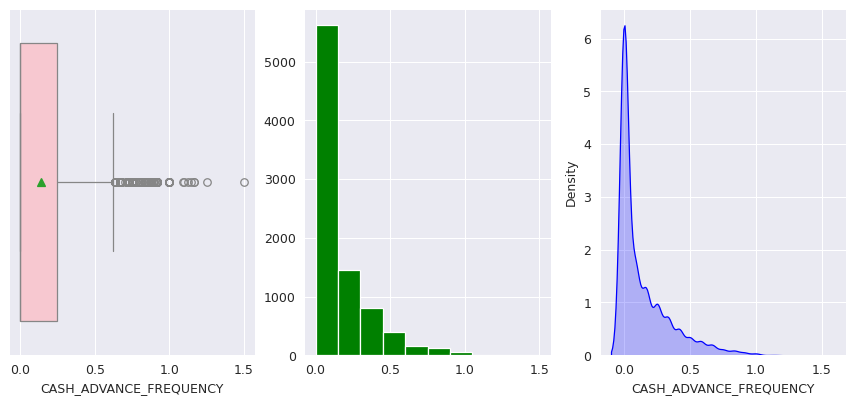

In [85]:
fig, axes = plt.subplots(1,3,figsize=(12,5),dpi = 90)

# count of col (countplot)

sns.boxplot(x =df1.CASH_ADVANCE_FREQUENCY, showmeans=True, orient='h',color="pink",data = df1,ax=axes[0] )

df1['CASH_ADVANCE_FREQUENCY'].hist(bins = 10,color='green',ax=axes[1])
sns.kdeplot(df1.CASH_ADVANCE_FREQUENCY, shade=True,ax=axes[2] ,color ='blue')
plt.show()

ASH_ADVANCE_FREQUENCY > 1.4

In [86]:
df1[df1['CASH_ADVANCE_FREQUENCY']>1.4]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2919,3846.74253,1.0,0.0,0.0,0.0,1932.460679,0.0,0.0,0.0,1.5,18,0,5600.0,496.245836,538.346874,0.0,6


In [87]:
df1['CASH_ADVANCE_FREQUENCY'].nlargest(5)

2919    1.500000
640     1.250000
1530    1.166667
3129    1.166667
8086    1.142857
Name: CASH_ADVANCE_FREQUENCY, dtype: float64

In [88]:
df1['CASH_ADVANCE_FREQUENCY'].describe()

count    8636.000000
mean        0.137604
std         0.201791
min         0.000000
25%         0.000000
50%         0.000000
75%         0.250000
max         1.500000
Name: CASH_ADVANCE_FREQUENCY, dtype: float64

In [89]:
mask1 = df1['CASH_ADVANCE_FREQUENCY']<1.4
df1[mask]['CASH_ADVANCE_FREQUENCY'].describe()

count    8635.000000
mean        0.137504
std         0.201590
min         0.000000
25%         0.000000
50%         0.000000
75%         0.250000
max         1.500000
Name: CASH_ADVANCE_FREQUENCY, dtype: float64


Since the potential outlier in this column isn't significantly distant from the rest of the values and considering the small range of values, it doesn't have a major impact on the statistics. Moreover, in real-world scenarios, this value is plausible.

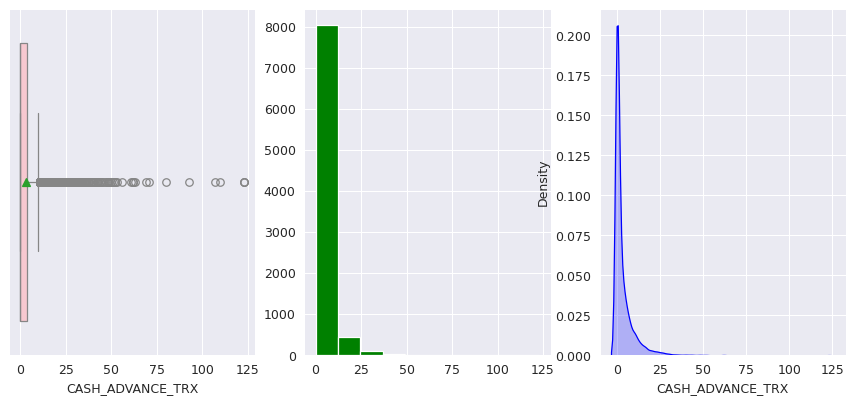

In [90]:
fig, axes = plt.subplots(1,3,figsize=(12,5),dpi = 90)

# count of col (countplot)

sns.boxplot(x =df1.CASH_ADVANCE_TRX, showmeans=True, orient='h',color="pink",data = df1,ax=axes[0] )

df1['CASH_ADVANCE_TRX'].hist(bins = 10,color='green',ax=axes[1])
sns.kdeplot(df1.CASH_ADVANCE_TRX, shade=True,ax=axes[2] ,color ='blue')
plt.show()

CASH_ADVANCE_TRX > 80

In [91]:
df1[df1['CASH_ADVANCE_TRX']>80]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
504,1284.633140,1.000000,55.50,0.00,55.50,5406.459348,0.083333,0.000000,0.083333,0.833333,123,1,3000.0,3432.757202,421.385587,0.000000,12
1812,1856.325339,0.818182,670.50,516.90,153.60,5603.126858,0.545455,0.272727,0.363636,0.727273,107,9,7000.0,9221.922948,537.180986,0.142857,11
2054,10905.053810,1.000000,431.93,133.50,298.43,47137.211760,0.583333,0.250000,0.500000,1.000000,123,21,19600.0,39048.597620,5394.173671,0.000000,12
3417,4175.826879,1.000000,0.00,0.00,0.00,9968.184827,0.000000,0.000000,0.000000,0.909091,110,0,10500.0,1083.433387,1000.206323,0.000000,11
5113,7268.706380,1.000000,306.91,306.91,0.00,12702.427700,0.272727,0.272727,0.000000,1.000000,93,4,12000.0,3512.633784,2096.962594,0.000000,11
8039,2648.244646,1.000000,0.00,0.00,0.00,10458.978150,0.000000,0.000000,0.000000,1.000000,123,0,4000.0,9818.531412,665.888853,0.000000,12


In [92]:
df1['CASH_ADVANCE_TRX'].describe()

count    8636.000000
mean        3.313918
std         6.912506
min         0.000000
25%         0.000000
50%         0.000000
75%         4.000000
max       123.000000
Name: CASH_ADVANCE_TRX, dtype: float64

In [93]:
mas = df1['CASH_ADVANCE_TRX'] <= 80
df1[mas]['CASH_ADVANCE_TRX'].describe()

count    8630.000000
mean        3.237543
std         6.271590
min         0.000000
25%         0.000000
50%         0.000000
75%         4.000000
max        80.000000
Name: CASH_ADVANCE_TRX, dtype: float64


The outliers in this column had a minor impact on the mean value but significantly influenced the standard deviation. These outliers are located at indices 504, 2054, 8039, 3417, 1812, and 5113.

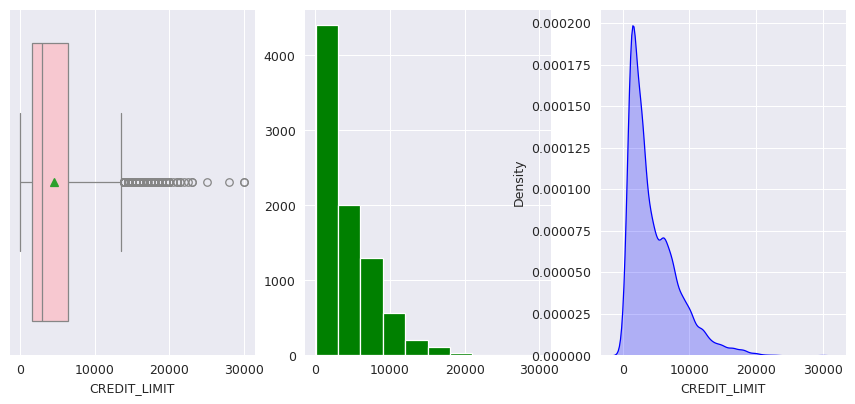

In [94]:
fig, axes = plt.subplots(1,3,figsize=(12,5),dpi = 90)

# count of col (countplot)

sns.boxplot(x =df1.CREDIT_LIMIT, showmeans=True, orient='h',color="pink",data = df1,ax=axes[0] )

df1['CREDIT_LIMIT'].hist(bins = 10,color='green',ax=axes[1])
sns.kdeplot(df1.CREDIT_LIMIT, shade=True,ax=axes[2] ,color ='blue')
plt.show()

CREDIT_LIMIT >= 25000

In [95]:
df1[df1['CREDIT_LIMIT']>= 25000]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
900,3108.393701,0.900000,26582.34,15158.90,11423.44,0.000000,0.900000,0.8,0.800000,0.0,0,55,28000.0,26557.097240,586.029097,0.875000,10
3527,177.592802,1.000000,1471.55,1471.55,0.00,0.000000,1.000000,1.0,0.000000,0.0,0,25,25000.0,1389.167981,262.826661,0.916667,12
4747,1409.256223,0.900000,4569.65,1748.94,2820.71,3883.517967,0.700000,0.6,0.600000,0.4,5,24,30000.0,5772.813158,472.103929,0.000000,10
6818,2980.054695,0.818182,26784.62,26514.32,270.30,0.000000,0.583333,0.5,0.083333,0.0,0,33,30000.0,30029.014960,11853.796130,0.750000,12


In [96]:
df1['CREDIT_LIMIT'].describe()

count     8636.000000
mean      4522.091030
std       3659.240379
min         50.000000
25%       1600.000000
50%       3000.000000
75%       6500.000000
max      30000.000000
Name: CREDIT_LIMIT, dtype: float64

In [97]:
mask_ = df1['CREDIT_LIMIT'] <= 25000
df1[mask_]['CREDIT_LIMIT'].describe()

count     8633.000000
mean      4513.469029
std       3630.476992
min         50.000000
25%       1600.000000
50%       3000.000000
75%       6500.000000
max      25000.000000
Name: CREDIT_LIMIT, dtype: float64


While the boxplot indicates the presence of some outliers, it's worth noting that the potential outliers are not significantly distant from the rest of the samples.

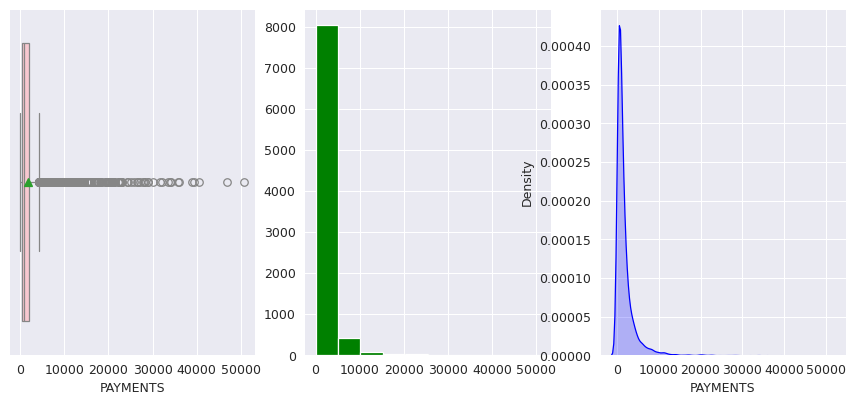

In [98]:
fig, axes = plt.subplots(1,3,figsize=(12,5),dpi = 90)

# count of col (countplot)

sns.boxplot(x =df1.PAYMENTS, showmeans=True, orient='h',color="pink",data = df1,ax=axes[0] )

df1['PAYMENTS'].hist(bins = 10,color='green',ax=axes[1])
sns.kdeplot(df1.PAYMENTS, shade=True,ax=axes[2] ,color ='blue')
plt.show()

PAYMENTS > 45000

In [99]:
df1[df1['PAYMENTS']>= 45000]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
512,11547.520010,1.000000,49039.57,40761.25,8278.32,558.166886,1.000000,1.000000,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12
4072,1268.809031,0.272727,17945.00,17945.00,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,18000.0,50721.48336,1149.747342,0.00,12


In [100]:
df1['PAYMENTS'].describe()

count     8636.000000
mean      1784.478099
std       2909.810090
min          0.049513
25%        418.559237
50%        896.675701
75%       1951.142090
max      50721.483360
Name: PAYMENTS, dtype: float64

In [101]:
mask = df1['PAYMENTS'] < 45000
df1[mask]['PAYMENTS'].describe()

count     8634.000000
mean      1773.581281
std       2820.521674
min          0.049513
25%        418.484380
50%        895.707030
75%       1947.827567
max      40627.595240
Name: PAYMENTS, dtype: float64


Indices 512 and 4072.

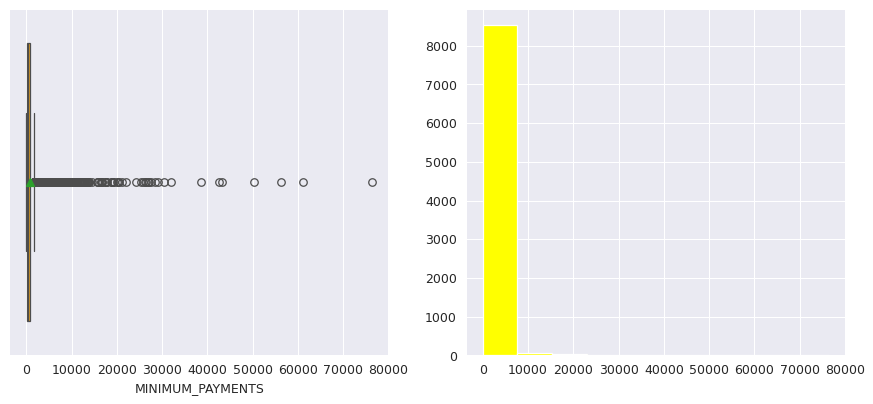

In [102]:
fig, axes = plt.subplots(1,2,figsize=(12,5),dpi = 90)

# count of col (countplot)

sns.boxplot(x =df1.MINIMUM_PAYMENTS, showmeans=True, orient='h',color="orange",data = df1,ax=axes[0] )

df1['MINIMUM_PAYMENTS'].hist(bins = 10,color='yellow',ax=axes[1])
plt.show()


MINIMUM_PAYMENTS > 35000

In [103]:
df1[df1['MINIMUM_PAYMENTS']> 35000]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
529,3457.086184,1.0,2448.60,0.0,2448.60,0.000000,1.0,0.0,1.0,0.000000,0,12,1700.0,227.514473,38512.12477,0.0,12
4226,10571.411070,1.0,7739.48,0.0,7739.48,0.000000,1.0,0.0,1.0,0.000000,0,44,8000.0,2688.447014,76406.20752,0.0,12
4311,4976.028578,1.0,900.87,0.0,900.87,0.000000,1.0,0.0,1.0,0.000000,0,162,5500.0,92.865469,50260.75947,0.0,12
5474,4628.109931,1.0,912.54,0.0,912.54,0.000000,1.0,0.0,1.0,0.000000,0,21,5000.0,3746.305759,56370.04117,0.0,12
5640,8038.893195,1.0,0.00,0.0,0.00,197.915586,0.0,0.0,0.0,0.166667,8,0,9000.0,3569.182969,43132.72823,0.0,12
5775,6022.224462,1.0,0.00,0.0,0.00,4111.465632,0.0,0.0,0.0,0.166667,6,0,7000.0,4560.775720,42629.55117,0.0,12
6902,9024.812044,1.0,0.00,0.0,0.00,2750.442399,0.0,0.0,0.0,0.083333,2,0,9000.0,302.484224,61031.61860,0.0,12


In [104]:
df1['MINIMUM_PAYMENTS'].describe()

count     8636.000000
mean       864.304943
std       2372.566350
min          0.019163
25%        169.163545
50%        312.452292
75%        825.496463
max      76406.207520
Name: MINIMUM_PAYMENTS, dtype: float64

In [105]:
mask = df1['MINIMUM_PAYMENTS'] > 35000
df1[mask == False]['MINIMUM_PAYMENTS'].describe()

count     8629.000000
mean       822.319441
std       1826.881731
min          0.019163
25%        169.079690
50%        311.963409
75%        819.267218
max      31871.363790
Name: MINIMUM_PAYMENTS, dtype: float64

index = 4226, 6902, 5474, 4311

In [106]:
# Create a copy of DataFrame df1 named df2
df2 = df1.copy()

# Remove rows with specified indices from df2
df2 = df1.drop([246, 464, 512, 1166, 1509, 1545, 3792, 3792, 5086, 2054, 504, 8039, 3417, 1812, 5113,
                4072, 4226, 6902, 5474, 4311])

# Reset the index of df2
df2.reset_index(drop=True, inplace=True)

# Create a copy of DataFrame df2 named df3
df3 = df2.copy()

# Display df2
df2


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
4,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8612,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6
8613,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8614,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8615,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


Analyzing the correlation between features reveals several pairs with high correlation, which may pose challenges for modeling. These pairs include:

ONEOFF_PURCHASES and PURCHASES PURCHASES_INSTALLMENTS_FREQUENCY and PURCHASES_FREQUENCY
CASH_ADVANCE_TRX and CASH_ADVANCE_FREQUENCY
High correlation between features can lead to collinearity issues, making it difficult to accurately assess their individual impact on the dependent variable. This can result in beta coefficients that appear unreasonable. Features with high correlation are more linearly dependent, thus having a similar effect on the dependent variable. Therefore, when two features have high correlation, it's advisable to drop one of them to mitigate collinearity issues.







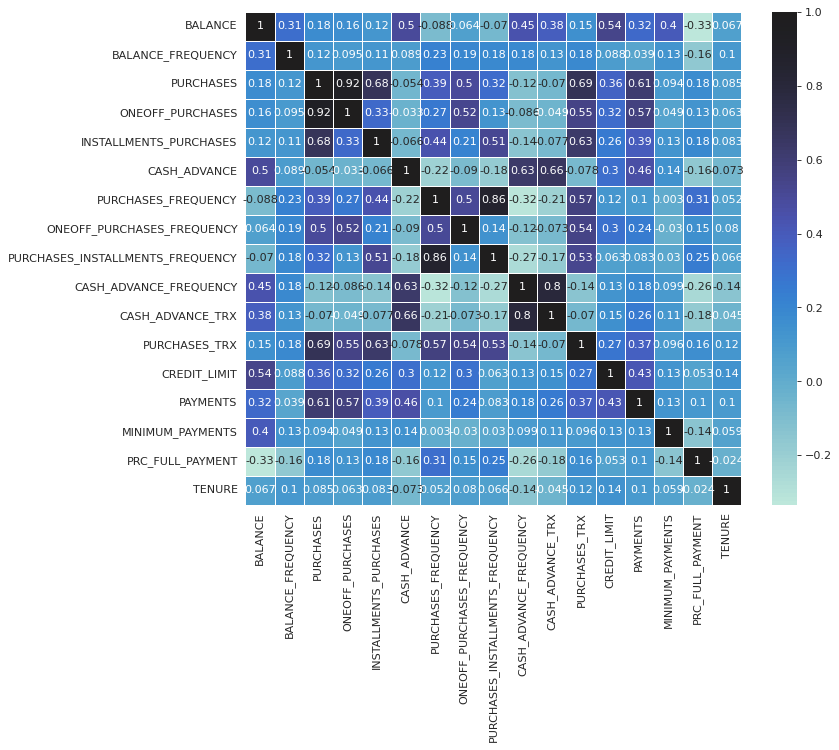

In [107]:
# Create a heatmap to visualize the correlation matrix of df1
fig, ax = plt.subplots(figsize=(10, 8), dpi=80)
sns.heatmap(df1.corr(), center=1, cbar=True, annot=True, linewidths=0.5, ax=ax)
plt.show()  # Display the heatmap


**Result of cheaking the noise**

The potential noisy samples (with indices 246, 464, 512, 1166, 1509, 1545, 3792, 3792, 5086, 2054, 504, 8039, 3417, 1812, 5113, 4072, 4226, 6902, 5474, and 4311) will be excluded from the main dataset and kept in a separate dataframe. This approach allows for their exclusion from certain algorithms while still enabling their inclusion in others, especially density-based clustering methods that are robust to outliers.

**More calculative measures to get more information about customer**

*Monthly Average Purchase*
**Monthly_Avg_Purchase=Purchase / Tenure**

In [ ]:
# Calculate the average monthly purchase for each customer
Monthly_Avg_Purchase = df3['PURCHASES'] / df3['TENURE']

# Add the Monthly Average Purchase column to the DataFrame df3
df3['Monthly_Avg_Purchase'] = df3['PURCHASES'] / df3['TENURE']

# Display the updated DataFrame df3
df3

*Monthly Average Cash Advance Amount*
**Monthly Average Cash = CASH_ADVANCE/TENURE**


In [109]:
#The average monthly cash advance for the customers
Monthly_Avg_Cash = df3['CASH_ADVANCE']/df3['TENURE']
df3['Monthly_Avg_Cash'] = df3['CASH_ADVANCE']/df3['TENURE']

*Division of Customers based on the type of Purchases (One-Off, Installments)*

To comprehend customer spending patterns based on the type of purchases, particularly distinguishing between one-off purchases and purchases made in installments. This categorization aims to identify whether customers predominantly make one-off purchases, primarily utilize installment plans, engage in both types of purchases, or exhibit no clear spending behavior in either category.

In [ ]:
# Step 1: Separating the Type of Purchases data into another dataframe
df_purchases = df3[['ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES']]

# Displaying the dataframe containing the Type of Purchases data
df_purchases

In [ ]:
df_purchases.info()

In [ ]:
# Step 2: Filtering the categories and counting the occurrences:

# 1. Counting customers who made neither one-off purchases nor purchases in installments
df_purchases[(df_purchases['ONEOFF_PURCHASES'] == 0) & (df_purchases['INSTALLMENTS_PURCHASES'] == 0)].shape


In [ ]:
# 2. Counting customers who made only one-off purchases
df_purchases[(df_purchases['ONEOFF_PURCHASES'] > 0) & (df_purchases['INSTALLMENTS_PURCHASES'] == 0)].shape

In [ ]:
# 3. Counting customers who made only purchases in installments
df_purchases[(df_purchases['ONEOFF_PURCHASES'] == 0) & (df_purchases['INSTALLMENTS_PURCHASES'] > 0)].shape


In [ ]:
# 4. Counting customers who made both one-off purchases and purchases in installments
df_purchases[(df_purchases['ONEOFF_PURCHASES'] > 0) & (df_purchases['INSTALLMENTS_PURCHASES'] > 0)].shape

We observe that the total **8949** customers with credit cards are divided into **4 categories** based on their purchase types: one-off purchases, purchases in installments, both types of purchases, or no purchases at all.

Therefore, we will create categories to group customers based on their purchase types (One-Off, Installments). The 4 categories are:

1. Customers making purchases in both categories *(Both_the_Purchases)*
2. Customers making purchases only in installments *(Installment_Purchases)*
3. Customers making purchases only as one-off transactions *(One_Of_Purchase)*
4. Customers making no purchases at all *(None_Of_the_Purchases)*

In [115]:
# Define Purchase_Type based on purchase categories
df3['Purchase_Type'] = np.where((df3['ONEOFF_PURCHASES'] == 0) & (df3['INSTALLMENTS_PURCHASES'] == 0),
                                'None_Of_the_Purchases',
                                np.where((df3['ONEOFF_PURCHASES'] > 0) & (df3['INSTALLMENTS_PURCHASES'] == 0),
                                         'One_Of_Purchase',
                                         np.where((df_purchases['ONEOFF_PURCHASES'] == 0) & (df_purchases['INSTALLMENTS_PURCHASES'] > 0),
                                                  'Installment_Purchases',
                                                  'Both_the_Purchases')))

# Display the counts of each Purchase_Type category
df3['Purchase_Type'].value_counts()


Both_the_Purchases       2732
Installment_Purchases    2143
None_Of_the_Purchases    1962
One_Of_Purchase          1780
Name: Purchase_Type, dtype: int64

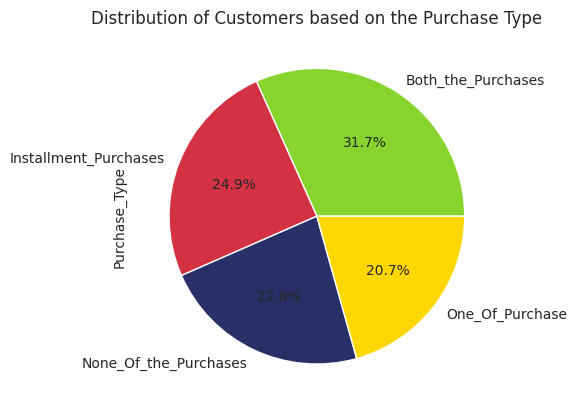

In [116]:
# Plotting the distribution of customers based on Purchase Type
df3['Purchase_Type'].value_counts().sort_index().plot(kind='pie', autopct='%1.01f%%',
                                                      colors=['#87d42f', '#d33243', '#292f67', '#FFD700'],
                                                      fontsize=10, textprops={'fontsize': 18})
plt.title('Distribution of Customers based on the Purchase Type')
plt.show()


* 31.7% of customers engage in both One-Off and Installment Purchases, while 24.9% exclusively make installment purchases.
* The dataset includes attributes PURCHASES_TRX for average amount per purchase transaction and CASH_ADVANCE_TRX for average amount per cash advance transaction.



*Estimating the Limit Usage of customers*
A higher utilization rate indicates the presence of credit risk, while a lower utilization rate is desirable.

**Balance-to-Limit Ratio= Credit Limit/Balance**

​This ratio helps assess how much of the available credit a customer is using. A lower ratio suggests that the customer is using less of their available credit, which is typically viewed positively in terms of credit risk.


In [117]:
df3['Limit_Usage'] = df3['BALANCE']/df3['CREDIT_LIMIT']

*Payments to Minimum_Payments Ratio*
The Payments to Minimum Payments Ratio compares the amount paid towards the credit card balance to the minimum required payment.

**Pay_to_MinimumPay = PAYMENTS/MINIMUM_PAYMENTS**

In [ ]:
df3['Pay_to_MinimumPay'] = df3['PAYMENTS']/df3['MINIMUM_PAYMENTS']
df3['Pay_to_MinimumPay']

Exploring the data using the Purchase_Type feature alongside other attributes will provide insights into customer profiles and behavior. This analysis will help us understand how customers' purchasing patterns differ based on the types of purchases they make.

**Exploring Customer Behavior Based on Purchase Types and Attributes**

*Pay_to_MinimumPay over Purchase Type*

Ratio of payments made to minimum payments due, categorized by Purchase Type.

In [122]:
# Step 1: Calculate the average of Pay_to_MinimumPay for each Purchase Type
average_pay_to_min_ratio = df3.groupby(by=['Purchase_Type'])['Pay_to_MinimumPay'].mean().sort_values(ascending=False)

t1 = average_pay_to_min_ratio
# Display the results
t1

Purchase_Type
Installment_Purchases    13.953559
None_Of_the_Purchases    10.472854
Both_the_Purchases        7.261802
One_Of_Purchase           5.719297
Name: Pay_to_MinimumPay, dtype: float64

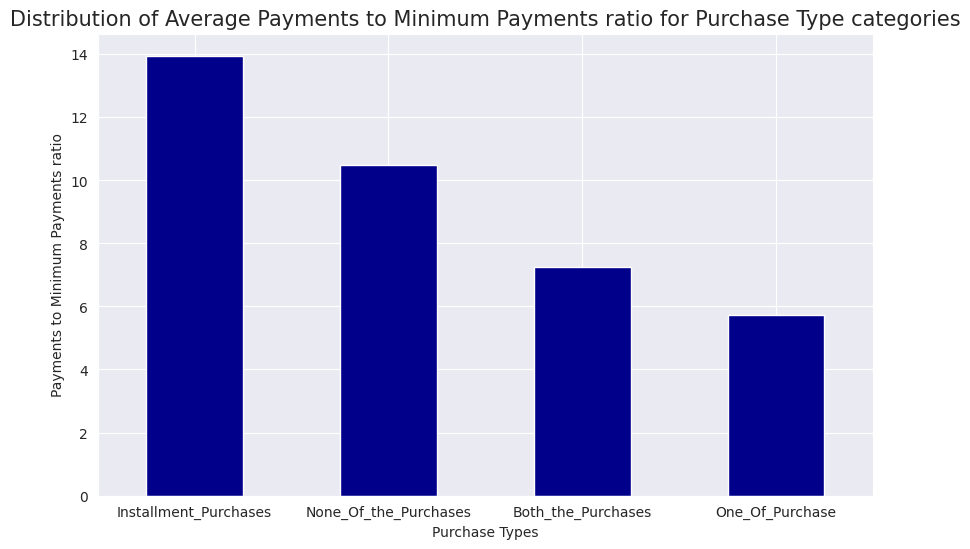

In [144]:
# Step 2: Plot the graph
plt.figure(figsize=(10, 6))
t1.plot(kind='bar', color='darkblue')
plt.title('Distribution of Average Payments to Minimum Payments ratio for Purchase Type categories', fontsize=15)
plt.xlabel('Purchase Types', fontsize=10)
plt.ylabel('Payments to Minimum Payments ratio', fontsize=10)
plt.xticks(rotation=0,fontsize=10)
plt.show()

Among the Purchase Type categories, customers who made installment purchases paid the highest average minimum payment dues.

*Balance to Credit Limit ratio (or Utilization rate) over Purchase Type*


*Balance-to-Credit-Limit Ratio (Utilization Rate) by Purchase Type*

In [131]:
# Step 1: Calculate the average Limit Usage (credit card score) for each Purchase Type
average_limit_usage = df3.groupby(['Purchase_Type'])['Limit_Usage'].mean().sort_values(ascending=True).reset_index()

t2 = average_limit_usage

# Display the results
t2

,Purchase_Type,Limit_Usage
0,Installment_Purchases,0.281046
1,Both_the_Purchases,0.354199
2,One_Of_Purchase,0.392630
3,None_Of_the_Purchases,0.589042


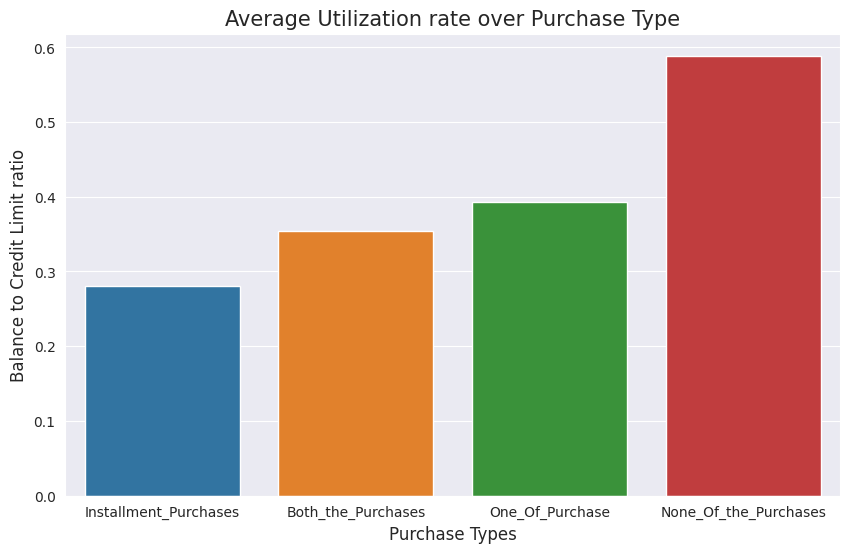

In [141]:
# Step 2: Plot the graph of Average Utilization rate over Purchase Type
plt.figure(figsize=(10, 6))  # Increase the figure size
sns.barplot(x=t2['Purchase_Type'], y=t2['Limit_Usage'], palette='tab10')
plt.title('Average Utilization rate over Purchase Type', fontsize=15)
plt.xlabel('Purchase Types', fontsize=12)
plt.ylabel('Balance to Credit Limit ratio', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


Customers who make installment purchases exhibit the lowest balance-to-limit ratio, which is desirable as it indicates lower credit risk.

*Monthly_Avg_Purchase over Purchase Type*

Average monthly purchase amount categorized by Purchase Type.

In [ ]:
df4=df3.copy()
df4.head()

In [146]:
# Step 1: Calculate the average of Monthly Average Purchase for each Purchase Type
average_monthly_purchase = df3.groupby(by=['Purchase_Type'])['Monthly_Avg_Purchase'].mean().sort_values(ascending=False)

t3 = average_monthly_purchase

# Display the results
t3

Purchase_Type
Both_the_Purchases       185.923592
One_Of_Purchase           69.947214
Installment_Purchases     47.139489
None_Of_the_Purchases      0.000000
Name: Monthly_Avg_Purchase, dtype: float64

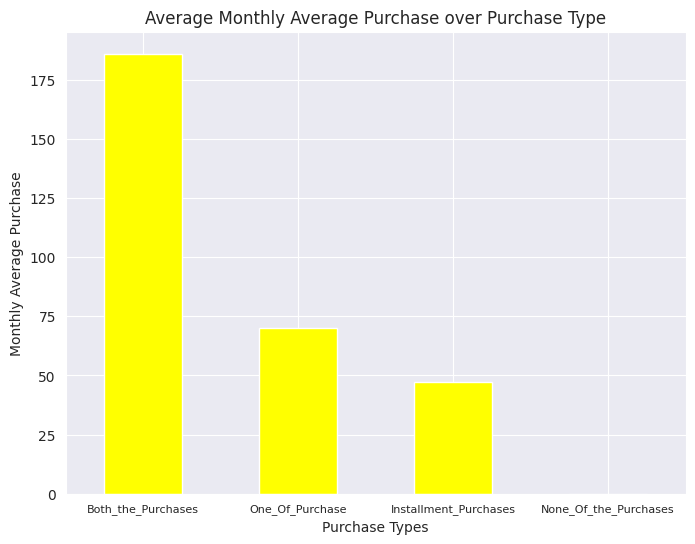

In [148]:
# Step 2: Plot the graph
plt.figure(figsize=(8, 6))
t3.plot(kind='bar', color='yellow')
plt.title('Average Monthly Average Purchase over Purchase Type')
plt.xlabel('Purchase Types')
plt.ylabel('Monthly Average Purchase')
plt.xticks(rotation=0,fontsize=8)
plt.show()



The highest total average purchase amount over the last 12 months is made by customers who have made both one-off and installment purchases.

*Monthly_Avg_Purchase over Purchase Type*

Average monthly purchase amount categorized by Purchase Type.

In [149]:
# Step 1: Calculate the average of Monthly Average Cash Advance for each Purchase Type
average_monthly_cash_advance = df3.groupby(['Purchase_Type'])['Monthly_Avg_Cash'].mean().sort_values(ascending=False).reset_index()

t4 = average_monthly_cash_advance

# Display the results
t4

,Purchase_Type,Monthly_Avg_Cash
0,None_Of_the_Purchases,183.596224
1,One_Of_Purchase,80.643241
2,Both_the_Purchases,66.597039
3,Installment_Purchases,39.949690


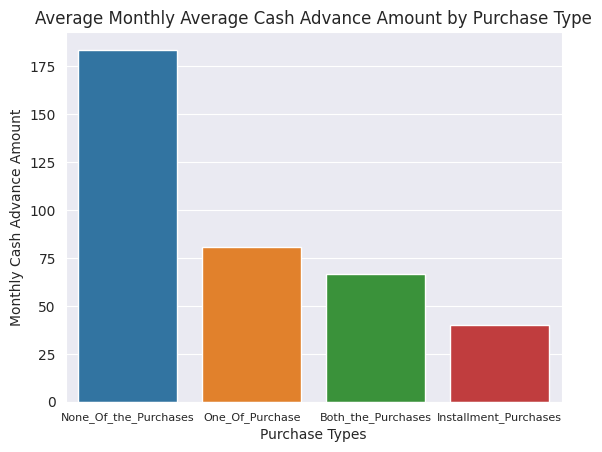

In [151]:
# Plot the graph
sns.barplot(x=t4['Purchase_Type'], y=t4['Monthly_Avg_Cash'], palette='tab10')
plt.title('Average Monthly Average Cash Advance Amount by Purchase Type')
plt.xlabel('Purchase Types')
plt.ylabel('Monthly Cash Advance Amount')
plt.xticks(rotation=0,fontsize=8)
plt.show()


Customers who made neither one-off nor installment purchases have the highest monthly average cash in advance amount.

In [152]:
# Calculate the correlation matrix
corr_df = df3.corr()

# Display the correlation matrix
corr_df


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_Avg_Purchase,Monthly_Avg_Cash,Limit_Usage,Pay_to_MinimumPay
BALANCE,1.000000,0.310670,0.164405,0.147641,0.114328,0.502581,-0.091541,0.061410,-0.072653,0.448533,...,0.141681,0.532579,0.321658,0.435306,-0.336189,0.066345,0.162258,0.479010,0.494148,-0.041289
BALANCE_FREQUENCY,0.310670,1.000000,0.139125,0.109379,0.122582,0.089905,0.227933,0.187296,0.183717,0.181317,...,0.185464,0.088466,0.043473,0.151985,-0.157797,0.104709,0.135285,0.075587,0.387729,-0.109171
PURCHASES,0.164405,0.139125,1.000000,0.900538,0.692257,-0.054586,0.439578,0.544524,0.349202,-0.133529,...,0.708350,0.359737,0.550532,0.094061,0.187089,0.091876,0.994537,-0.059137,-0.078403,0.016083
ONEOFF_PURCHASES,0.147641,0.109379,0.900538,1.000000,0.309687,-0.031253,0.297787,0.586582,0.134195,-0.091396,...,0.543400,0.325335,0.500153,0.046228,0.135300,0.069065,0.896023,-0.035153,-0.059754,0.008744
INSTALLMENTS_PURCHASES,0.114328,0.122582,0.692257,0.309687,1.000000,-0.067617,0.467046,0.217147,0.540917,-0.140409,...,0.647230,0.246667,0.373820,0.128849,0.184601,0.086286,0.687800,-0.071097,-0.072388,0.020649
CASH_ADVANCE,0.502581,0.089905,-0.054586,-0.031253,-0.067617,1.000000,-0.224184,-0.092351,-0.183514,0.633525,...,-0.079903,0.305365,0.482115,0.170723,-0.161294,-0.075994,-0.049687,0.975463,0.215713,-0.003804
PURCHASES_FREQUENCY,-0.091541,0.227933,0.439578,0.297787,0.467046,-0.224184,1.000000,0.501639,0.862071,-0.316421,...,0.576892,0.120173,0.099999,-0.006394,0.304788,0.051823,0.440555,-0.222953,-0.219193,0.010633
ONEOFF_PURCHASES_FREQUENCY,0.061410,0.187296,0.544524,0.586582,0.217147,-0.092351,0.501639,1.000000,0.142120,-0.117601,...,0.548586,0.293391,0.244139,-0.028816,0.151781,0.080166,0.543800,-0.094248,-0.105866,-0.005713
PURCHASES_INSTALLMENTS_FREQUENCY,-0.072653,0.183717,0.349202,0.134195,0.540917,-0.183514,0.862071,0.142120,1.000000,-0.268439,...,0.537214,0.061473,0.080884,0.022254,0.248757,0.065370,0.346347,-0.184503,-0.173848,0.017428
CASH_ADVANCE_FREQUENCY,0.448533,0.181317,-0.133529,-0.091396,-0.140409,0.633525,-0.316421,-0.117601,-0.268439,1.000000,...,-0.136522,0.133074,0.196711,0.127372,-0.260093,-0.140477,-0.128187,0.631391,0.354537,-0.022851


Dropping the original variables 'BALANCE', 'PURCHASES', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'TENURE', and 'CASH_ADVANCE', as they were used to create new variables. These original variables may have high correlation with the derived variables, causing redundancy in the dataset.

In [154]:
df5 = df3.copy()
# Dropping the original variables 'BALANCE','PURCHASES','PAYMENTS','MINIMUM_PAYMENTS','TENURE','CASH_ADVANCE'
df5.drop(['BALANCE','CREDIT_LIMIT','PURCHASES','PAYMENTS','MINIMUM_PAYMENTS','TENURE','CASH_ADVANCE'], axis=1, inplace=True)

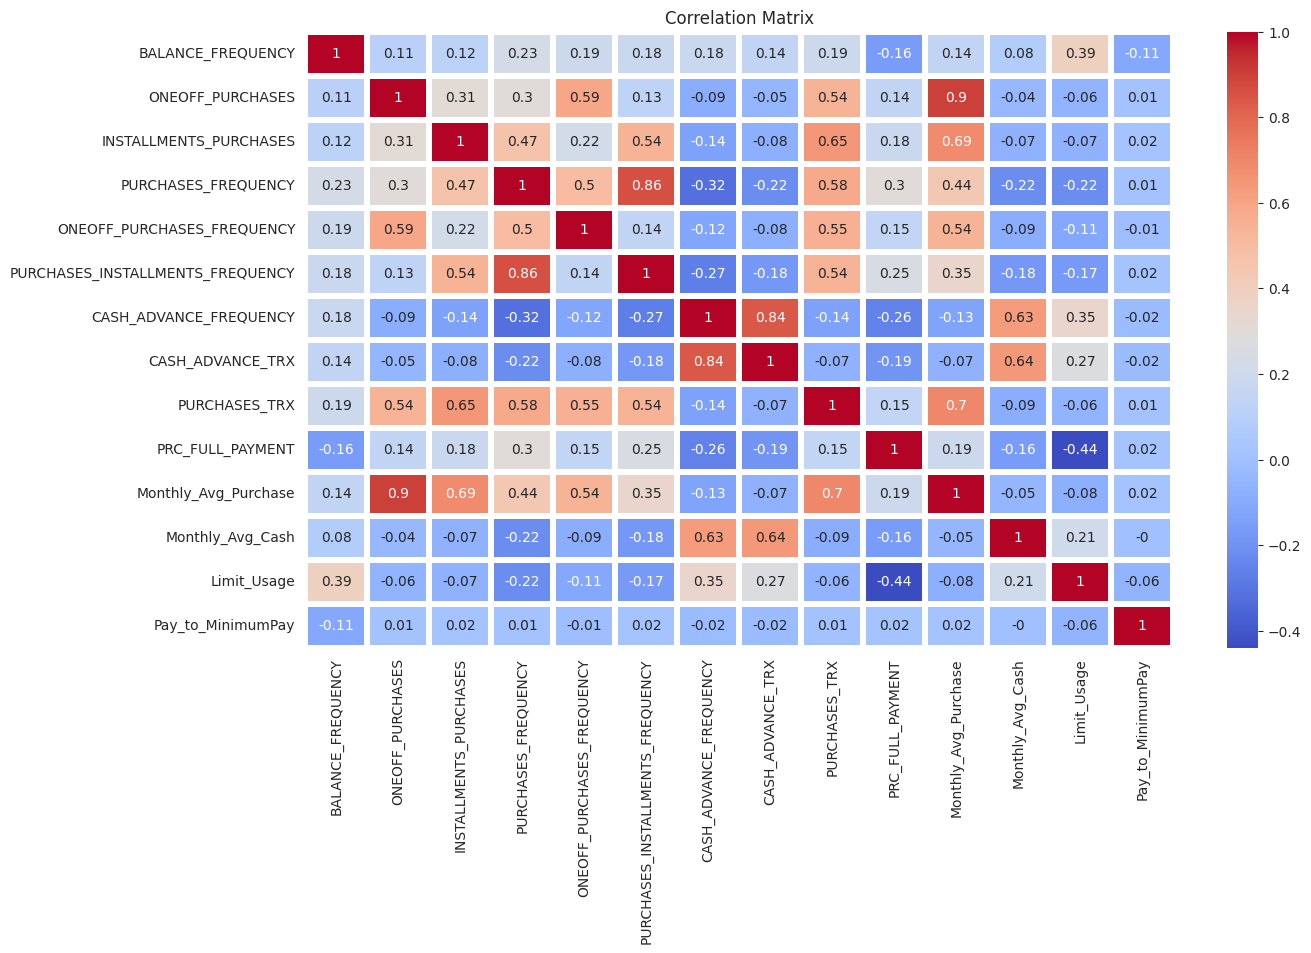

In [163]:
### Finding Correlation among the variables:
plt.figure(figsize=(14, 8))
sns.heatmap(round(df5.corr(), 2), annot=True, cmap='coolwarm', linewidths=3, fmt='.2g')
plt.title('Correlation Matrix')
plt.show()


*The correlation value above 0.50 is considered highly correlated. Observing the heatmap:*

- OneOFF_Purchases is highly positively correlated with Monthly_Avg_Purchase at a correlation of 0.91.
- Installment_Purchases is correlated with Purchases_Trx at a correlation of 0.63, and with Monthly_Avg_Purchase at a correlation of 0.68.
- Purchases_Frequency is positively correlated with Purchases_Installment_Frequency at a correlation of 0.86, and also with Purchases_Trx at a correlation of 0.57.
- Cash_Advance_Frequency is highly positively correlated with Cash_Advance_Trx at a correlation of 0.80, and with Monthly_Avg_Cash at a correlation of 0.63.
- Cash_Advance_Trx is also positively correlated with Monthly_Avg_Cash at a correlation of 0.63.
- Purchases_Trx is positively correlated with Monthly_Avg_Purchase at a correlation of 0.68.

**Creatinag a Model**

In [165]:
# Create dummy variables for Purchase_Type using pd.get_dummies()
x_cat = pd.get_dummies(df5['Purchase_Type'], drop_first=True)  # Drop the first category to avoid multicollinearity
x_cat  # Display the resulting dummy variables dataframe


,Installment_Purchases,None_Of_the_Purchases,One_Of_Purchase
0,1,0,0
1,0,1,0
2,0,0,1
3,0,0,1
4,1,0,0
...,...,...,...
8612,0,0,1
8613,1,0,0
8614,1,0,0
8615,0,1,0


In [166]:
# Filter numerical variables
x_num = df5.dtypes[df5.dtypes != 'object'].index.to_list()  # Select columns with non-object data type
x_num  # Display numerical variable names

['BALANCE_FREQUENCY',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'PRC_FULL_PAYMENT',
 'Monthly_Avg_Purchase',
 'Monthly_Avg_Cash',
 'Limit_Usage',
 'Pay_to_MinimumPay']

In [167]:
# Filter numerical variables in the original df from df4 (Copy of df):
x_num_df4 = df4.dtypes[df4.dtypes != 'object'].index.to_list()
x_num_df4

['BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT',
 'TENURE',
 'Monthly_Avg_Purchase',
 'Monthly_Avg_Cash',
 'Limit_Usage',
 'Pay_to_MinimumPay']

In [168]:
# Concatenate original variables with dummy variables without scaling the numerical variables:
original_df = pd.concat([x_cat, df4[x_num_df4]], axis=1)
original_df.head()

,Installment_Purchases,None_Of_the_Purchases,One_Of_Purchase,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_Avg_Purchase,Monthly_Avg_Cash,Limit_Usage,Pay_to_MinimumPay
0,1,0,0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,...,2,1000.0,201.802084,139.509787,0.000000,12,7.950000,0.000000,0.040901,1.446508
1,0,1,0,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,...,0,7000.0,4103.032597,1072.340217,0.222222,12,0.000000,536.912124,0.457495,3.826241
2,0,0,1,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,...,12,7500.0,622.066742,627.284787,0.000000,12,64.430833,0.000000,0.332687,0.991682
3,0,0,1,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,...,1,1200.0,678.334763,244.791237,0.000000,12,1.333333,0.000000,0.681429,2.771075
4,1,0,0,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,...,8,1800.0,1400.057770,2407.246035,0.000000,12,111.106667,0.000000,1.005460,0.581601


**Data Normalization**  : Normalization scales numeric features to a common range, ensuring consistency in distances between data points, which is crucial for clustering algorithms.

In [169]:
# Initialize the StandardScaler
SS = StandardScaler()

# Fit and transform the numerical variables using StandardScaler
# StandardScaler standardizes features by removing the mean and scaling to unit variance
x_scaled = pd.DataFrame(SS.fit_transform(df5[x_num]), columns=x_num)
x_scaled.head()

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,PRC_FULL_PAYMENT,Monthly_Avg_Purchase,Monthly_Avg_Cash,Limit_Usage,Pay_to_MinimumPay
0,-0.369483,-0.409967,-0.372471,-0.820152,-0.685953,-0.716436,-0.683240,-0.516680,-0.526780,-0.537592,-0.488740,-0.470749,-0.913403,-0.065539
1,0.068113,-0.409967,-0.484580,-1.235585,-0.685953,-0.925847,0.561245,0.120787,-0.608612,0.212800,-0.539091,2.352934,0.153924,-0.045777
2,0.505708,0.137885,-0.484580,1.257007,2.651757,-0.925847,-0.683240,-0.516680,-0.117624,-0.537592,-0.131025,-0.470749,-0.165839,-0.069316
3,0.505708,-0.398629,-0.484580,-1.027869,-0.407812,-0.925847,-0.683240,-0.516680,-0.567696,-0.537592,-0.530646,-0.470749,0.727648,-0.054539
4,0.505708,-0.409967,1.082224,0.426144,-0.685953,0.540037,-0.683240,-0.516680,-0.281286,-0.537592,0.164591,-0.470749,1.557826,-0.072722


In [170]:
# Combine the categorical and scaled numerical datasets
concat_df = pd.concat([x_cat, x_scaled], axis=1)
concat_df.head()

,Installment_Purchases,None_Of_the_Purchases,One_Of_Purchase,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,PRC_FULL_PAYMENT,Monthly_Avg_Purchase,Monthly_Avg_Cash,Limit_Usage,Pay_to_MinimumPay
0,1,0,0,-0.369483,-0.409967,-0.372471,-0.820152,-0.685953,-0.716436,-0.683240,-0.516680,-0.526780,-0.537592,-0.488740,-0.470749,-0.913403,-0.065539
1,0,1,0,0.068113,-0.409967,-0.484580,-1.235585,-0.685953,-0.925847,0.561245,0.120787,-0.608612,0.212800,-0.539091,2.352934,0.153924,-0.045777
2,0,0,1,0.505708,0.137885,-0.484580,1.257007,2.651757,-0.925847,-0.683240,-0.516680,-0.117624,-0.537592,-0.131025,-0.470749,-0.165839,-0.069316
3,0,0,1,0.505708,-0.398629,-0.484580,-1.027869,-0.407812,-0.925847,-0.683240,-0.516680,-0.567696,-0.537592,-0.530646,-0.470749,0.727648,-0.054539
4,1,0,0,0.505708,-0.409967,1.082224,0.426144,-0.685953,0.540037,-0.683240,-0.516680,-0.281286,-0.537592,0.164591,-0.470749,1.557826,-0.072722


**P C A**

* PCA (Principal Component Analysis) is a dimensionality reduction technique.
* It identifies new axes or dimensions for a dataset.
* These axes are chosen to explain the maximum variance in the data.
* The first principal component explains the most variance.
* Subsequent components are orthogonal to preceding ones and explain the maximum remaining variance.
* PCA allows for the reduction of the original feature space to a lower-dimensional space while retaining as much variance as possible.






In [171]:
# Initialize PCA model with 17 components
pca_model = PCA(n_components=17)

# Fit PCA model and transform the concatenated dataframe
X_PCA = pca_model.fit_transform(concat_df)

# Calculate cumulative variance explained by the principal components
pca_var = pca_model.explained_variance_ratio_
np.cumsum(pca_var)


array([0.31023849, 0.49214505, 0.59278292, 0.68455476, 0.75358996,
       0.81330658, 0.85747505, 0.88897616, 0.91980887, 0.94801191,
       0.9670375 , 0.97916126, 0.98896382, 0.99500309, 0.99764374,
       0.99959893, 1.        ])

In [172]:
# Calculate cumulative variance explained by the principal components
var1 = np.cumsum(np.round(pca_model.explained_variance_ratio_, decimals=6) * 100)
var1

array([ 31.0238,  49.2145,  59.2783,  68.4555,  75.359 ,  81.3307,
        85.7475,  88.8976,  91.9809,  94.8012,  96.7038,  97.9162,
        98.8965,  99.5004,  99.7645,  99.96  , 100.0001])

In [173]:
# Create a summary table showing Eigen Vectors, Eigen Values, and variance explained by each component
vec_val = pd.DataFrame({'Eigen_Values': pca_model.explained_variance_,
                        'Cumulative_Variance': var1},
                       index=range(1, 18)).round(4)
vec_val


,Eigen_Values,Cumulative_Variance
1,4.5072,31.0238
2,2.6428,49.2145
3,1.4621,59.2783
4,1.3333,68.4555
5,1.0030,75.3590
6,0.8676,81.3307
7,0.6417,85.7475
8,0.4577,88.8976
9,0.4479,91.9809
10,0.4097,94.8012


Conclusion:
* We chose 7 components, which collectively explain 85% of the variation. Each individual component explains more than 0.7 variance.
* By selecting these 7 dimensions out of the 17 variables, we lose only about 15% of the variation (information) of the data.

In [174]:
# Perform PCA with 8 components
PCA_7 = PCA(n_components=7)
X_PCA_7 = PCA_7.fit_transform(concat_df)

# Create a dataframe to store the principal components
PC = pd.DataFrame(X_PCA_7, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'])
PC

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-0.999508,-1.566347,0.319368,0.165456,0.075502,-0.477421,-0.301472
1,-2.290391,0.831879,0.391321,-0.824282,-0.216912,-0.259709,0.614434
2,1.011912,-0.157612,1.021156,1.475315,-0.510094,2.057424,-1.006933
3,-1.356400,-0.693525,0.304158,1.536354,0.220469,-0.086051,0.397937
4,0.409153,-0.166180,-1.580047,1.187576,0.698190,-0.998496,0.410131
...,...,...,...,...,...,...,...
8612,-1.104696,-1.876141,1.478333,-0.199330,0.036626,-0.503943,-1.192354
8613,1.027183,-1.563714,-1.461616,-0.726096,-0.480064,0.610024,0.573331
8614,0.391773,-1.697233,-0.915987,-0.559157,-0.237666,0.174358,-0.275532
8615,-1.527349,-1.075914,0.779128,-0.319933,-0.235875,-0.311051,0.530133


Following are the Principal components taking all the 17 variables:

In [175]:
# Extracting the list of columns from the concatenated dataframe
list_cols = concat_df.columns

# Create a dataframe to store the principal components along with all variables
PC_with_all_variables = pd.DataFrame(PCA_7.components_.T,
                                    columns=['PC_' + str(i) for i in range(1, 8)],
                                    index=list_cols)
PC_with_all_variables


,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7
Installment_Purchases,0.020430,-0.096215,-0.172632,-0.094489,0.010862,-0.056729,0.016668
None_Of_the_Purchases,-0.113019,0.045696,0.043051,0.012939,0.031656,-0.093950,0.141584
One_Of_Purchase,-0.029251,-0.008406,0.152378,0.065771,-0.030950,0.080714,-0.052503
BALANCE_FREQUENCY,0.065580,0.290269,-0.340072,0.406244,-0.083016,0.334325,0.453942
ONEOFF_PURCHASES,0.300230,0.226685,0.452662,0.102717,-0.003486,-0.042033,0.087433
INSTALLMENTS_PURCHASES,0.325320,0.138220,-0.163801,-0.126947,0.160577,-0.512308,0.127455
PURCHASES_FREQUENCY,0.382387,-0.001297,-0.328163,-0.073586,-0.072114,0.314344,-0.223542
ONEOFF_PURCHASES_FREQUENCY,0.290351,0.166580,0.310681,0.147969,-0.144809,0.493197,-0.235693
PURCHASES_INSTALLMENTS_FREQUENCY,0.330401,-0.022118,-0.514752,-0.160402,0.029826,0.015422,-0.153038
CASH_ADVANCE_FREQUENCY,-0.222355,0.457688,-0.043480,-0.237084,-0.050303,0.066639,-0.009000


In [176]:
# Exporting the dataframe containing principal components with all variables to a CSV file
PC_with_all_variables.to_csv('PC_with_all_variables.csv')

# Variance explained by each of the components
pd.Series(PCA_7.explained_variance_ratio_ * 100, index=['PC_' + str(i) for i in range(1, 8)])

PC_1    31.023849
PC_2    18.190656
PC_3    10.063787
PC_4     9.177184
PC_5     6.903520
PC_6     5.971662
PC_7     4.416847
dtype: float64

**Determining the Optimal Number of Clusters using KMeans**

KMeans is a popular clustering algorithm used to partition data into distinct groups based on similarities in features. It works by iteratively assigning data points to the nearest cluster centroid and updating centroids to minimize the within-cluster sum of squared distances.

* Fit KMeans with different cluster numbers.
*Calculate inertia for each cluster number.
* Plot cluster number against inertia and identify the elbow point.
* Alternatively, compute silhouette score for each cluster number.
* Choose the number of clusters at the elbow point or with maximum silhouette score.
* This ensures effective clustering while avoiding overfitting.

In [177]:
# Finding the Optimal clusters using KMeans, Silhouette Coefficient Score for KMeans

wcss = []  # List to store within-cluster sum of squares
sil_kmeans = []  # List to store silhouette scores

# Iterate over different numbers of clusters
for i in range(3, 9):

    # K-Means Clustering
    kmeans = KMeans(n_clusters=i, n_init=100, init='k-means++', random_state=0)
    kmeans.fit(X_PCA_7)

    # Calculate Inertia and Silhouette Score for Clusters using K-Means:
    in_km = kmeans.inertia_
    wcss.append(in_km)
    sil_km = silhouette_score(X_PCA_7, kmeans.labels_)
    sil_kmeans.append(sil_km)

    # Print results
    print('Number of clusters:', i)
    print('KMeans Inertia:', in_km)
    print('Silhouette Score for KMeans:', sil_km)
    print()


Number of clusters: 3
KMeans Inertia: 69831.40238885014
Silhouette Score for KMeans: 0.25394002603232524

Number of clusters: 4
KMeans Inertia: 59868.742503654285
Silhouette Score for KMeans: 0.25909627233405874

Number of clusters: 5
KMeans Inertia: 52290.351679220636
Silhouette Score for KMeans: 0.29125230639629507

Number of clusters: 6
KMeans Inertia: 45481.28919875243
Silhouette Score for KMeans: 0.2915300354007237

Number of clusters: 7
KMeans Inertia: 39841.93731827545
Silhouette Score for KMeans: 0.30567044470115057

Number of clusters: 8
KMeans Inertia: 36396.13780979904
Silhouette Score for KMeans: 0.3009599472478366



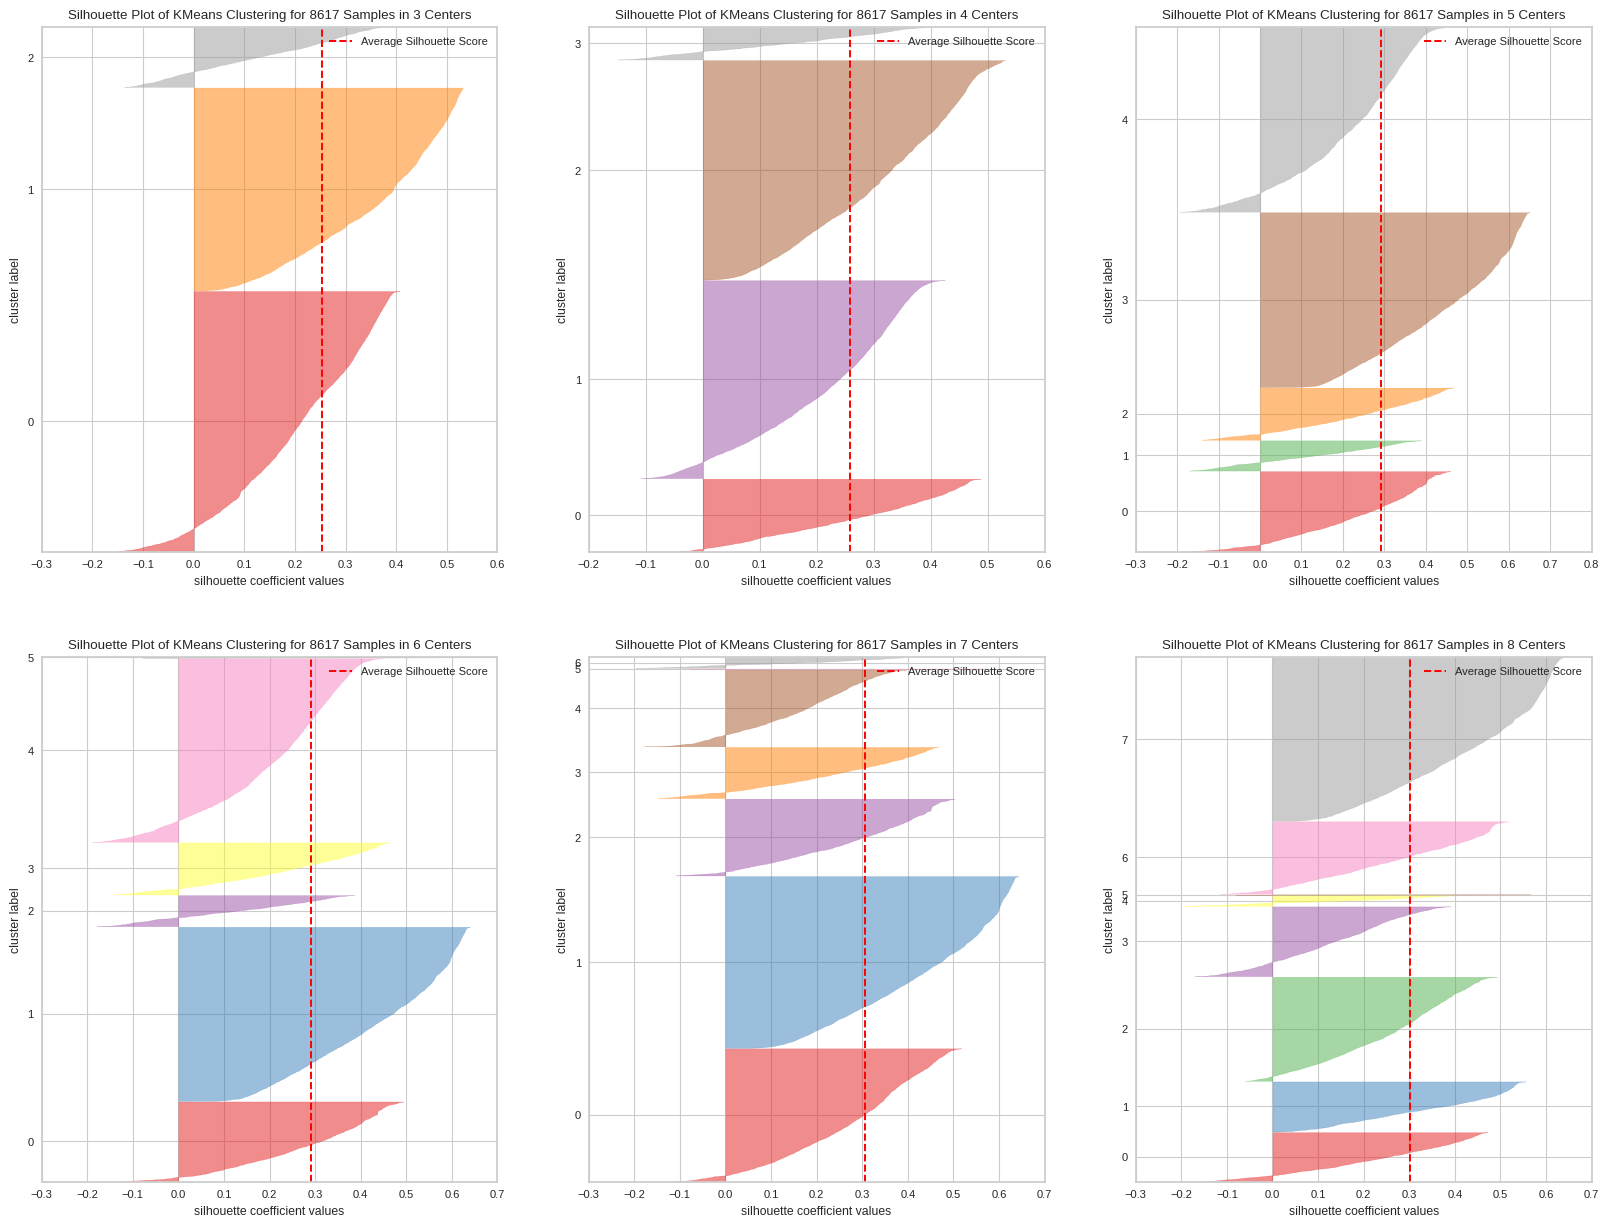

In [178]:
# Importing necessary libraries and modules
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.pyplot as plt

# Setting the style for plotting
plt.style.use('seaborn-paper')

# Creating subplots grid with 2 rows and 3 columns
fig, axs = plt.subplots(2, 3, figsize=(20, 15))
axs = axs.reshape(6)

# Iterating over different numbers of clusters
for i, k in enumerate(range(3, 9)):
    # Retrieving the corresponding axis for visualization
    ax = axs[i]

    # Creating SilhouetteVisualizer instance for KMeans clustering
    sil = SilhouetteVisualizer(KMeans(n_clusters=k, n_init=100, init='k-means++', random_state=0), ax=ax)

    # Fitting the visualizer to the PCA-transformed data and finalizing the visualization
    sil.fit(X_PCA_7)
    sil.finalize()


***Elbow Method***-

**WCSS Calculation:** The elbow method involves calculating the within-cluster sum of squares (WCSS) for various numbers of clusters.
- **Cluster Tightness:** WCSS measures how tightly data points are clustered around their centroids.
- **Elbow Curve:** Plotting WCSS against the number of clusters generates an elbow curve.
- **Curve Behavior:** The curve typically decreases as the number of clusters increases.
- **Elbow Point:** The optimal number of clusters is identified at the point where the curve starts to flatten out.
- **Trade-off:** Choosing the number of clusters involves balancing capturing important patterns in the data and avoiding overfitting.
- **Decision Point:** The elbow method aids in selecting an appropriate number of clusters by identifying the point where the WCSS improvement levels off.
- **Additional Analysis:** Sometimes, determining the optimal number of clusters may require supplementary techniques if the elbow point is not clearly discernible.

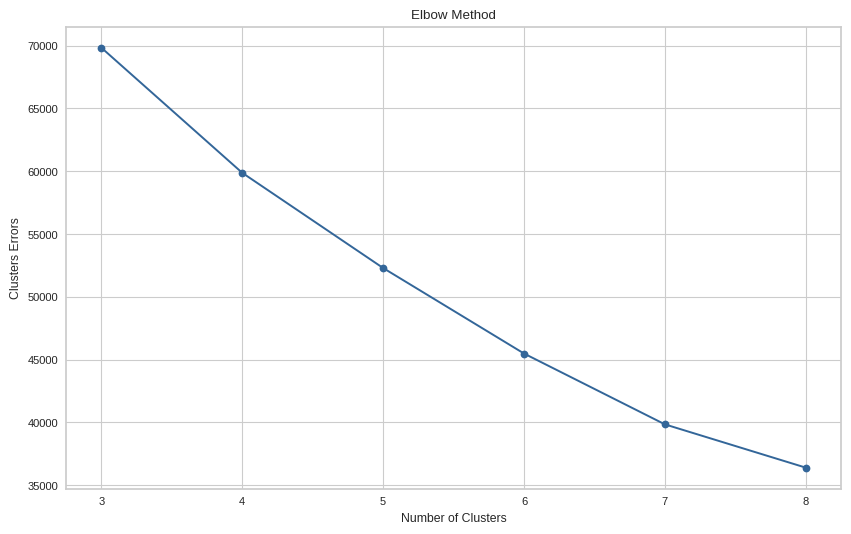

In [184]:
# Plotting graph of Elbow Method
plt.figure(figsize=(10,6))
plt.plot(range(3,9), wcss, c ='#336699', marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Clusters Errors')
plt.show()

#The elbow point, where the curve begins to flatten out, suggests the optimal number of clusters.

The "inertia" refers to the sum of squared distances of each data point within a cluster from its respective centroid. Utilizing the elbow method, the optimal number of clusters (K) is determined by identifying the point at which the inertia stops dropping significantly.

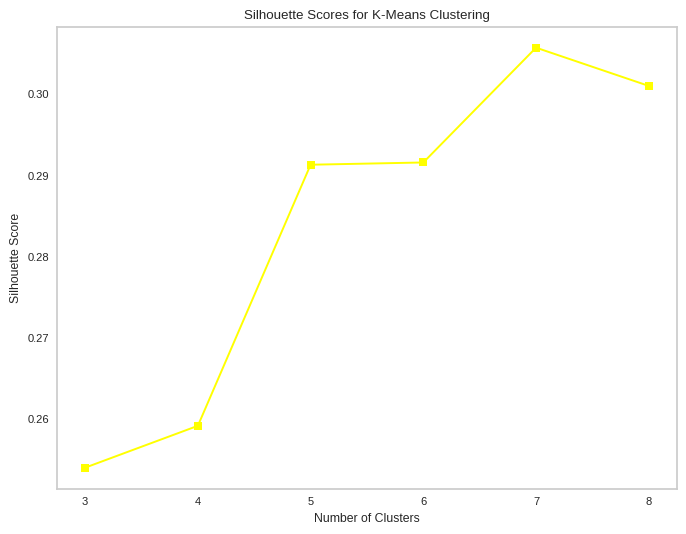

In [186]:
# Plotting the Silhouette Scores for K-Means Clustering
plt.figure(figsize=(8,6))
plt.plot(range(3,9), sil_kmeans, marker='s', c='yellow')
plt.title('Silhouette Scores for K-Means Clustering')  # Set title
plt.xlabel('Number of Clusters')  # Label x-axis
plt.ylabel('Silhouette Score')  # Label y-axis
plt.grid()  # Add grid lines
plt.show()  # Display the plot


**K-Means Clusters: For K= 3**

This code applies K-Means clustering with K=3, then visualizes the spread of the data using scatter plots for each pair of principal components. The clusters are represented by different colors.







Scatter plot for Principal Components 0 and 1


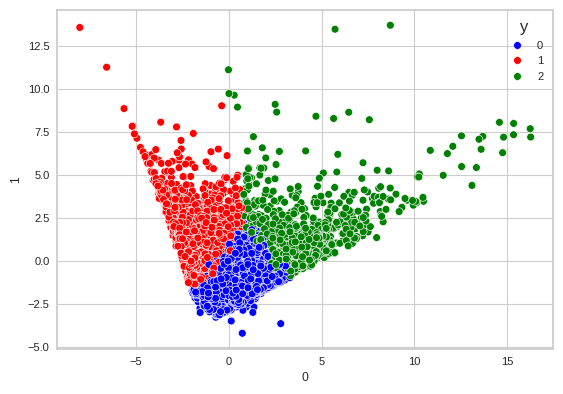

Scatter plot for Principal Components 1 and 2


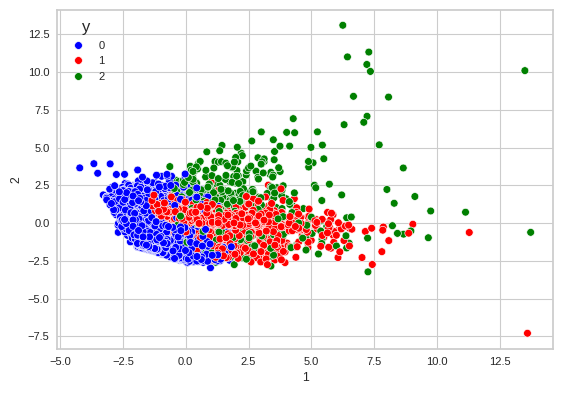

Scatter plot for Principal Components 2 and 3


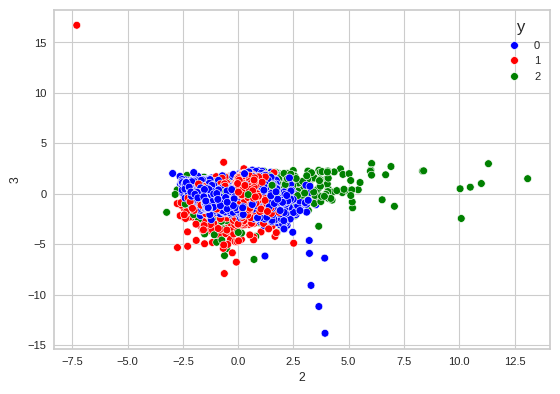

Scatter plot for Principal Components 3 and 4


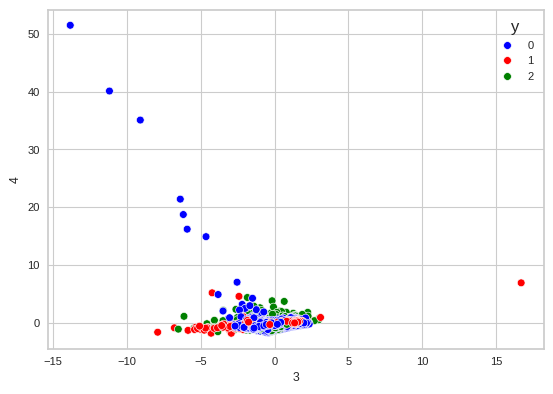

Scatter plot for Principal Components 4 and 5


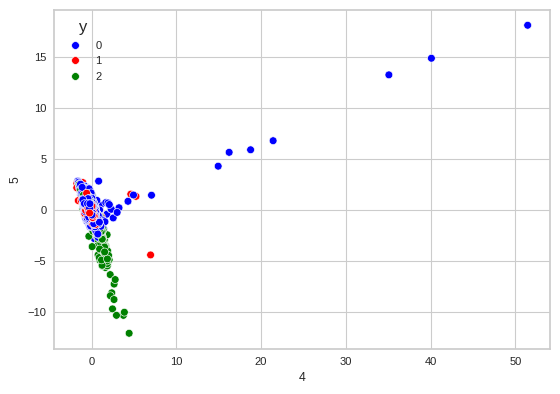

Scatter plot for Principal Components 5 and 6


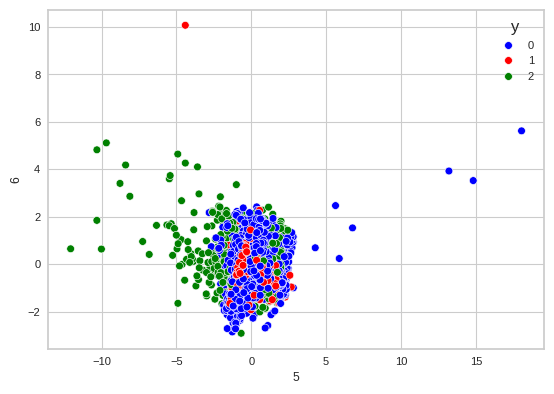

In [187]:
# Applying K-Means Clustering with K=3
kmeans = KMeans(n_clusters=3, n_init=100, init='k-means++', random_state=0)
kmeans.fit(X_PCA_7)

# Creating DataFrame for PCA components and cluster labels
df_pca = pd.DataFrame(X_PCA_7)
y_lab = pd.Series(kmeans.labels_, name='y')

# Concatenating the dataframes
df_final = pd.concat([df_pca, y_lab], axis=1)

# Visualizing the spread of the data for each pair of principal components
for i in range(6):
    print('Scatter plot for Principal Components', i, 'and', i+1)
    sns.scatterplot(x=df_pca[i], y=df_pca[i+1], hue=df_final['y'], palette=['blue', 'red', 'green'])
    plt.show()


In [190]:
# Creating K-Means clusters with K=3
km_3 = KMeans(n_clusters=3, n_init=100, init='k-means++', random_state=0)
KM_3 = km_3.fit(X_PCA_7)

In [ ]:
# Accessing the cluster labels assigned by KMeans clustering
KM_3.labels_

In [193]:
# Retrieving the centroids for Cluster 3 from the KMeans model
KM_3.cluster_centers_

array([[ 0.52015594, -1.00069239, -0.24123221, -0.16009087, -0.04226848,
         0.08948984, -0.15557991],
       [-1.81794991,  0.83803063,  0.11880944,  0.1779803 ,  0.0416549 ,
        -0.08991271,  0.21739566],
       [ 3.92035376,  1.5063418 ,  0.64624596,  0.09157659,  0.04233723,
        -0.08377662, -0.06217555]])

In [194]:
# Appending the cluster labels obtained from KMeans clustering to the original dataframe
original_df['cluster_3'] = KM_3.labels_

In [ ]:
# Appending the cluster labels obtained from KMeans clustering to the original dataframe
original_df['cluster_3'] = KM_3.labels_

In [195]:
# the new data set has Original variables + the Cluster Labels from each of the clusters got from K-Means
original_df.head()

,Installment_Purchases,None_Of_the_Purchases,One_Of_Purchase,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,...,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_Avg_Purchase,Monthly_Avg_Cash,Limit_Usage,Pay_to_MinimumPay,cluster_3
0,1,0,0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,...,1000.0,201.802084,139.509787,0.000000,12,7.950000,0.000000,0.040901,1.446508,0
1,0,1,0,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,...,7000.0,4103.032597,1072.340217,0.222222,12,0.000000,536.912124,0.457495,3.826241,1
2,0,0,1,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,...,7500.0,622.066742,627.284787,0.000000,12,64.430833,0.000000,0.332687,0.991682,0
3,0,0,1,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,...,1200.0,678.334763,244.791237,0.000000,12,1.333333,0.000000,0.681429,2.771075,1
4,1,0,0,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,...,1800.0,1400.057770,2407.246035,0.000000,12,111.106667,0.000000,1.005460,0.581601,0


Similar to above
**K-Means Clusters: For K= 4**

Scatter plot for Principal Components 0 and 1


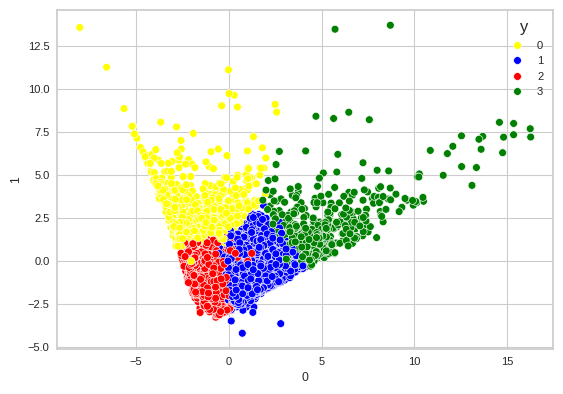

Scatter plot for Principal Components 1 and 2


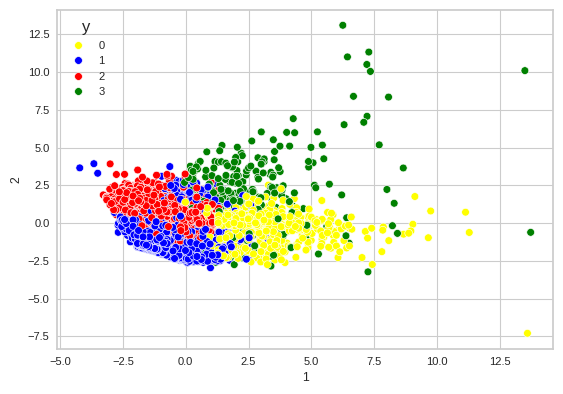

Scatter plot for Principal Components 2 and 3


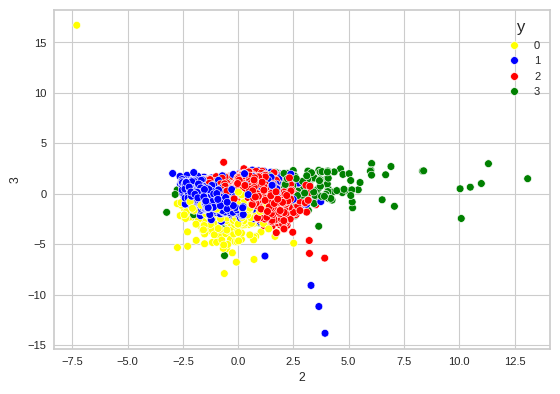

Scatter plot for Principal Components 3 and 4


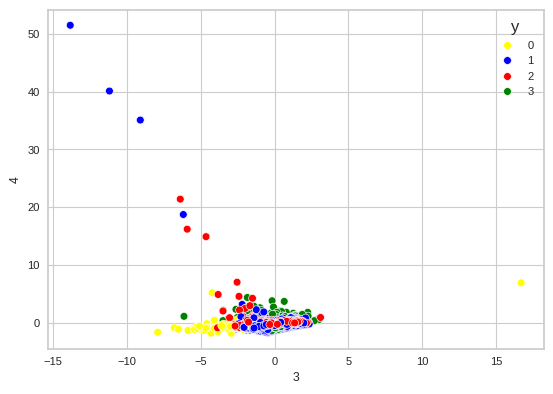

Scatter plot for Principal Components 4 and 5


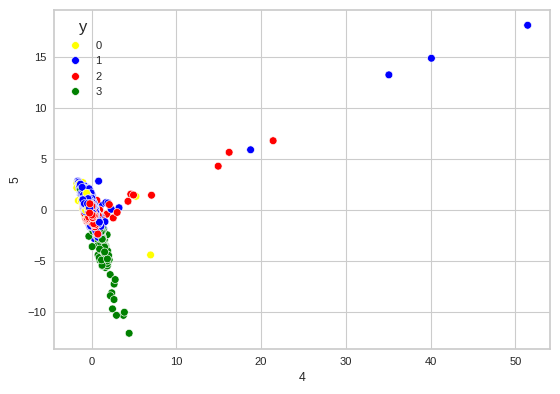

Scatter plot for Principal Components 5 and 6


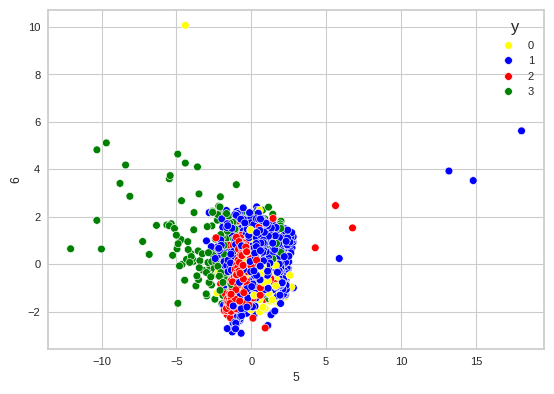

In [197]:
# Applying Clustering and visualizing the spread of the data (finding out if the data points have been clustered correctly through visualization)

# K-Means Clusters: For K= 4
kmeans = KMeans(n_clusters=4, n_init=100, init='k-means++', random_state=0)
kmeans.fit(X_PCA_7)

# Taking into each dataframes
df_pca = pd.DataFrame(X_PCA_7)
y_lab = pd.Series(kmeans.labels_, name='y')  # labels for clusters

# concatenating the dataframe:
df_final = pd.concat([df_pca, y_lab], axis=1)

# As there are 7 dimensions, hence we need to plot for each of the different pairs to visualize the spread of the data:
for i in range(6):
    print('Scatter plot for Principal Components', i, 'and', i+1)
    sns.scatterplot(x=df_pca[i], y=df_pca[i+1], hue=df_final['y'], palette=['yellow', 'blue', 'red', 'green'])
    plt.show()


In [205]:
km_4 = KMeans(n_clusters=4, n_init=100, init='k-means++', random_state=0)
KM_4 = km_4.fit(X_PCA_7)

In [ ]:
KM_4.labels_

In [207]:
# Centroids for Cluster 4:
KM_4.cluster_centers_

array([[-2.07439887,  2.48327274, -0.15527968, -0.887318  , -0.18286689,
         0.19374006, -0.023708  ],
       [ 1.28041263, -0.58735231, -0.72726976, -0.11228133, -0.10401738,
         0.34933819, -0.0535256 ],
       [-1.21218044, -0.58480387,  0.53663258,  0.36202502,  0.11648676,
        -0.27962648,  0.03892834],
       [ 5.05805106,  2.00571965,  1.15931895,  0.21865887,  0.25638728,
        -0.67587382,  0.11678949]])

**K-Means Clusters: For Clsuters for K = 5, 6,7,8**

In [208]:
# Fit KMeans models with different numbers of clusters (4 to 8)
KM_4 = KMeans(n_clusters=4, n_init=100, init='k-means++', random_state=0).fit(X_PCA_7)  # Fit KMeans model with 4 clusters
KM_5 = KMeans(n_clusters=5, n_init=100, init='k-means++', random_state=0).fit(X_PCA_7)  # Fit KMeans model with 5 clusters
KM_6 = KMeans(n_clusters=6, n_init=100, init='k-means++', random_state=0).fit(X_PCA_7)  # Fit KMeans model with 6 clusters
KM_7 = KMeans(n_clusters=7, n_init=100, init='k-means++', random_state=0).fit(X_PCA_7)  # Fit KMeans model with 7 clusters
KM_8 = KMeans(n_clusters=8, n_init=100, init='k-means++', random_state=0).fit(X_PCA_7)  # Fit KMeans model with 8 clusters

In [209]:
# Append the cluster labels to the original data (not standardized data)
original_df['cluster_3'] = KM_3.labels_
original_df['cluster_4'] = KM_4.labels_
original_df['cluster_5'] = KM_5.labels_
original_df['cluster_6'] = KM_6.labels_
original_df['cluster_7'] = KM_7.labels_
original_df['cluster_8'] = KM_8.labels_
# The new dataset contains original variables along with cluster labels

In [210]:
# Displaying the new dataset containing original variables along with cluster labels
original_df.head()

,Installment_Purchases,None_Of_the_Purchases,One_Of_Purchase,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,...,Monthly_Avg_Purchase,Monthly_Avg_Cash,Limit_Usage,Pay_to_MinimumPay,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8
0,1,0,0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,...,7.950000,0.000000,0.040901,1.446508,0,2,0,0,2,6
1,0,1,0,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,...,0.000000,536.912124,0.457495,3.826241,1,0,3,1,1,7
2,0,0,1,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,...,64.430833,0.000000,0.332687,0.991682,0,1,4,4,4,3
3,0,0,1,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,...,1.333333,0.000000,0.681429,2.771075,1,2,3,1,1,7
4,1,0,0,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,...,111.106667,0.000000,1.005460,0.581601,0,1,4,4,0,2


In [211]:
# Calculating the distribution of segments for cluster K = 3
segment_distribution_k3 = pd.Series.sort_index(original_df.cluster_3.value_counts()) / sum(original_df.cluster_5.value_counts())
segment_distribution_k3

0    0.497737
1    0.388186
2    0.114077
Name: cluster_3, dtype: float64

In [212]:
# Calculating the distribution of segments for cluster K = 4
segment_distribution_k4 = pd.Series.sort_index(original_df.cluster_4.value_counts()) / sum(original_df.cluster_5.value_counts())
segment_distribution_k4

0    0.138679
1    0.379134
2    0.420448
3    0.061738
Name: cluster_4, dtype: float64

In [213]:
# Calculating the distribution of segments for cluster K = 5
segment_distribution_k5 = pd.Series.sort_index(original_df.cluster_5.value_counts()) / sum(original_df.cluster_5.value_counts())
segment_distribution_k5

0    0.153302
1    0.057909
2    0.100035
3    0.335151
4    0.353603
Name: cluster_5, dtype: float64

In [215]:
# Calculating the distribution of segments for cluster K = 6
segment_distribution_k6 = pd.Series.sort_index(original_df.cluster_6.value_counts()) / sum(original_df.cluster_6.value_counts())
segment_distribution_k6

0    0.152953
1    0.334223
2    0.059650
3    0.100151
4    0.352211
5    0.000812
Name: cluster_6, dtype: float64

In [216]:
# Calculating the distribution of segments for cluster K = 7
segment_distribution_k7 = pd.Series.sort_index(original_df.cluster_7.value_counts()) / sum(original_df.cluster_7.value_counts())
segment_distribution_k7

0    0.255193
1    0.330045
2    0.147615
3    0.098294
4    0.147615
5    0.000812
6    0.020425
Name: cluster_7, dtype: float64

In [217]:
# Calculating the distribution of segments for cluster K = 8
segment_distribution_k8 = pd.Series.sort_index(original_df.cluster_8.value_counts()) / sum(original_df.cluster_8.value_counts())
segment_distribution_k8

0    0.094116
1    0.096553
2    0.200302
3    0.134269
4    0.020077
5    0.000812
6    0.139376
7    0.314495
Name: cluster_8, dtype: float64

In [218]:
# Getting the total number of observations in cluster 3
original_df.cluster_3.size

# Step 1b: Get the breakdown of the values in each segment:
# This shows how many observations are there in each respective segment:

original_df.cluster_3.value_counts()

0    4289
1    3345
2     983
Name: cluster_3, dtype: int64

In [219]:
# Sorting the index of the value counts provides:
# The value counts based on the Segment Label (0, 1, 2 depending upon the K-value) in the index
# and not based on the highest value within the segments

pd.Series.sort_index(original_df.cluster_3.value_counts())

0    4289
1    3345
2     983
Name: cluster_3, dtype: int64

In [220]:
# Combining the size for each cluster K value into one single array:

size = pd.concat([pd.Series(original_df.cluster_3.size),
                  pd.Series.sort_index(original_df.cluster_3.value_counts()),
                  pd.Series.sort_index(original_df.cluster_4.value_counts()),
                  pd.Series.sort_index(original_df.cluster_5.value_counts()),
                  pd.Series.sort_index(original_df.cluster_6.value_counts()),
                  pd.Series.sort_index(original_df.cluster_7.value_counts()),
                  pd.Series.sort_index(original_df.cluster_8.value_counts())])


In [221]:
size
# Gives the size of Segments for each of the Clusters :

0    8617
0    4289
1    3345
2     983
0    1195
1    3267
2    3623
3     532
0    1321
1     499
2     862
3    2888
4    3047
0    1318
1    2880
2     514
3     863
4    3035
5       7
0    2199
1    2844
2    1272
3     847
4    1272
5       7
6     176
0     811
1     832
2    1726
3    1157
4     173
5       7
6    1201
7    2710
dtype: int64

In [222]:
# Segment Size:
Seg_size=pd.DataFrame(size, columns=['Seg_size'])

# Segment Distribtuion % wise:
Seg_Pct = pd.DataFrame(size/original_df.cluster_3.size, columns=['Seg_Pct'])

# Taking Transpose of Segment Percentage :
Seg_Pct.T

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
Seg_Pct,1.0,0.497737,0.388186,0.114077,0.138679,0.379134,0.420448,0.061738,0.153302,0.057909,...,0.000812,0.020425,0.094116,0.096553,0.200302,0.134269,0.020077,0.000812,0.139376,0.314495


In [223]:
# Concatenating the Segment Size and Segment Percentage:
pd.concat([Seg_size.T, Seg_Pct.T], axis=0)

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
Seg_size,8617.0,4289.000000,3345.000000,983.000000,1195.000000,3267.000000,3623.000000,532.000000,1321.000000,499.000000,...,7.000000,176.000000,811.000000,832.000000,1726.000000,1157.000000,173.000000,7.000000,1201.000000,2710.000000
Seg_Pct,1.0,0.497737,0.388186,0.114077,0.138679,0.379134,0.420448,0.061738,0.153302,0.057909,...,0.000812,0.020425,0.094116,0.096553,0.200302,0.134269,0.020077,0.000812,0.139376,0.314495


* Compute the overall average for each variable across the entire dataset.
* Calculate the average for each variable within each cluster.

A good indication of the distribution of data is the mean value, hence will find the average value for each variable and for each cluster.  

In [ ]:
# Overall each variables wise Avg:
original_df.apply(np.mean).T

In [226]:
# Grouping-by over each cluster to find the Segment wise average for each variable
original_df.groupby('cluster_3').apply(np.mean).T

cluster_3,0,1,2
Installment_Purchases,0.437864,0.074738,0.015259
None_Of_the_Purchases,0.019585,0.561435,0.000000
One_Of_Purchase,0.197249,0.255605,0.080366
BALANCE,704.510979,2478.242203,2451.809991
BALANCE_FREQUENCY,0.834624,0.946160,0.983824
PURCHASES,757.614036,218.191513,4635.730743
ONEOFF_PURCHASES,346.184127,162.312215,3009.029807
INSTALLMENTS_PURCHASES,411.796484,56.033076,1627.311312
CASH_ADVANCE,162.937571,2106.865542,757.691085
PURCHASES_FREQUENCY,0.661595,0.149110,0.951288


In [227]:
# Concatenating the overall average values for each variable with the segment-wise average values for each variable across different cluster sizes obtained from KMeans clustering

Profiling_output = pd.concat([
    # Overall average values for each variable
    original_df.apply(lambda x: x.mean()).T,
    # Segment-wise average values for each variable across cluster_3
    original_df.groupby('cluster_3').apply(lambda x: x.mean()).T,
    # Segment-wise average values for each variable across cluster_4
    original_df.groupby('cluster_4').apply(lambda x: x.mean()).T,
    # Segment-wise average values for each variable across cluster_5
    original_df.groupby('cluster_5').apply(lambda x: x.mean()).T,
    # Segment-wise average values for each variable across cluster_6
    original_df.groupby('cluster_6').apply(lambda x: x.mean()).T,
    # Segment-wise average values for each variable across cluster_7
    original_df.groupby('cluster_7').apply(lambda x: x.mean()).T,
    # Segment-wise average values for each variable across cluster_8
    original_df.groupby('cluster_8').apply(lambda x: x.mean()).T
], axis=1)

# Display the resulting DataFrame
Profiling_output


,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
Installment_Purchases,0.248694,0.437864,0.074738,0.015259,0.088703,0.444138,0.159536,0.015038,0.378501,0.016032,...,0.571429,0.034091,0.083847,0.701923,0.495944,0.000000,0.034682,0.571429,0.332223,0.083395
None_Of_the_Purchases,0.227689,0.019585,0.561435,0.000000,0.485356,0.000000,0.381452,0.000000,0.167298,0.000000,...,0.428571,0.000000,0.443896,0.000000,0.000000,0.000000,0.000000,0.428571,0.185679,0.507749
One_Of_Purchase,0.206568,0.197249,0.255605,0.080366,0.208368,0.073768,0.342810,0.090226,0.320969,0.086172,...,0.000000,0.045455,0.214550,0.012019,0.000000,0.276577,0.046243,0.000000,0.348043,0.313653
BALANCE,1592.375186,704.510979,2478.242203,2451.809991,3772.940891,933.335915,1274.289811,2907.654497,148.647117,2921.604235,...,1.796679,3981.097055,4005.975758,98.102567,1443.618793,1528.712136,3980.828445,1.796679,158.736797,1937.743371
BALANCE_FREQUENCY,0.894941,0.834624,0.946160,0.983824,0.965070,0.934274,0.822811,0.987082,0.470645,0.986410,...,0.277597,0.989618,0.958392,0.904863,0.974070,0.975077,0.989438,0.277597,0.458589,0.977237
PURCHASES,990.620927,757.614036,218.191513,4635.730743,418.310527,1121.380594,286.155015,6270.694417,387.851037,6461.245972,...,425.322857,9909.959602,522.877115,922.205072,941.516333,2598.531227,9978.049306,425.322857,345.698751,209.937550
ONEOFF_PURCHASES,578.576579,346.184127,162.312215,3009.029807,269.929900,497.125507,230.030351,4145.712707,235.632067,4275.357415,...,0.000000,6332.105682,333.819827,143.606550,243.510104,1994.777874,6370.670000,0.000000,229.035062,180.786860
INSTALLMENTS_PURCHASES,412.356131,411.796484,56.033076,1627.311312,148.465707,624.620340,56.343180,2126.109530,152.443649,2187.090962,...,425.322857,3581.263011,189.100099,778.741526,698.628650,603.795704,3610.847514,425.322857,116.910816,29.339926
CASH_ADVANCE,985.391066,162.937571,2106.865542,757.691085,4274.331455,233.812658,636.365389,589.983031,345.244538,546.978491,...,417.321256,820.292613,5121.264471,27.176280,421.474217,318.126295,807.996962,417.321256,385.016610,964.764714
PURCHASES_FREQUENCY,0.495703,0.661595,0.149110,0.951288,0.260114,0.871280,0.167821,0.951409,0.292248,0.950916,...,0.476190,0.953504,0.294397,0.861858,0.849866,0.897198,0.952697,0.476190,0.257858,0.122836


In [228]:
# Combining the outputs from steps 1 and 2:
# Concatenating the segment size, segment distribution, the overall averages, and the individual segment-wise average

Profiling_output_final = pd.concat([Seg_size.T, Seg_Pct.T, Profiling_output], axis=0)

# Adding column names to the final profiling output
Profiling_output_final.columns = ['Overall', 'KM3_1', 'KM3_2', 'KM3_3',
                                  'KM4_1', 'KM4_2', 'KM4_3', 'KM4_4',
                                  'KM5_1', 'KM5_2', 'KM5_3', 'KM5_4', 'KM5_5',
                                  'KM6_1', 'KM6_2', 'KM6_3', 'KM6_4', 'KM6_5', 'KM6_6',
                                  'KM7_1', 'KM7_2', 'KM7_3', 'KM7_4', 'KM7_5', 'KM7_6', 'KM7_7',
                                  'KM8_1', 'KM8_2', 'KM8_3', 'KM8_4', 'KM8_5', 'KM8_6', 'KM8_7', 'KM8_8']

# Display the final profiling output
Profiling_output_final

,Overall,KM3_1,KM3_2,KM3_3,KM4_1,KM4_2,KM4_3,KM4_4,KM5_1,KM5_2,...,KM7_6,KM7_7,KM8_1,KM8_2,KM8_3,KM8_4,KM8_5,KM8_6,KM8_7,KM8_8
Seg_size,8617.000000,4289.000000,3345.000000,983.000000,1195.000000,3267.000000,3623.000000,532.000000,1321.000000,499.000000,...,7.000000,176.000000,811.000000,832.000000,1726.000000,1157.000000,173.000000,7.000000,1201.000000,2710.000000
Seg_Pct,1.000000,0.497737,0.388186,0.114077,0.138679,0.379134,0.420448,0.061738,0.153302,0.057909,...,0.000812,0.020425,0.094116,0.096553,0.200302,0.134269,0.020077,0.000812,0.139376,0.314495
Installment_Purchases,0.248694,0.437864,0.074738,0.015259,0.088703,0.444138,0.159536,0.015038,0.378501,0.016032,...,0.571429,0.034091,0.083847,0.701923,0.495944,0.000000,0.034682,0.571429,0.332223,0.083395
None_Of_the_Purchases,0.227689,0.019585,0.561435,0.000000,0.485356,0.000000,0.381452,0.000000,0.167298,0.000000,...,0.428571,0.000000,0.443896,0.000000,0.000000,0.000000,0.000000,0.428571,0.185679,0.507749
One_Of_Purchase,0.206568,0.197249,0.255605,0.080366,0.208368,0.073768,0.342810,0.090226,0.320969,0.086172,...,0.000000,0.045455,0.214550,0.012019,0.000000,0.276577,0.046243,0.000000,0.348043,0.313653
BALANCE,1592.375186,704.510979,2478.242203,2451.809991,3772.940891,933.335915,1274.289811,2907.654497,148.647117,2921.604235,...,1.796679,3981.097055,4005.975758,98.102567,1443.618793,1528.712136,3980.828445,1.796679,158.736797,1937.743371
BALANCE_FREQUENCY,0.894941,0.834624,0.946160,0.983824,0.965070,0.934274,0.822811,0.987082,0.470645,0.986410,...,0.277597,0.989618,0.958392,0.904863,0.974070,0.975077,0.989438,0.277597,0.458589,0.977237
PURCHASES,990.620927,757.614036,218.191513,4635.730743,418.310527,1121.380594,286.155015,6270.694417,387.851037,6461.245972,...,425.322857,9909.959602,522.877115,922.205072,941.516333,2598.531227,9978.049306,425.322857,345.698751,209.937550
ONEOFF_PURCHASES,578.576579,346.184127,162.312215,3009.029807,269.929900,497.125507,230.030351,4145.712707,235.632067,4275.357415,...,0.000000,6332.105682,333.819827,143.606550,243.510104,1994.777874,6370.670000,0.000000,229.035062,180.786860
INSTALLMENTS_PURCHASES,412.356131,411.796484,56.033076,1627.311312,148.465707,624.620340,56.343180,2126.109530,152.443649,2187.090962,...,425.322857,3581.263011,189.100099,778.741526,698.628650,603.795704,3610.847514,425.322857,116.910816,29.339926


Based on the clustering analysis, we have identified 5 distinct clusters that provide the best solution for segmenting customers. Here's a summary of each segment:

1. **Big Tickets**: Customers in this segment make purchases very frequently and in large amounts. They are likely to be high-value customers who contribute significantly to revenue.
   
2. **Medium Tickets**: These customers prefer to make installment purchases and do so frequently. While they may not spend as much as the "Big Tickets" segment, they still contribute substantially to sales volume.
   
3. **Rare Purchasers**: People in this group make purchases, but less frequently. They often make one-off purchases rather than recurring transactions.
   
4. **Beginners**: Customers in this segment are just starting to make purchases but have yet to establish a consistent pattern. They may represent an opportunity for targeted marketing and